<a href="https://colab.research.google.com/github/Weaamzd/SPAI-Project/blob/main/SPAI_ModelTraining1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SPAI: **Football Detection**.

Notes on implementing this project using YOLOv11.

##Introduction

##### This project uses YOLOv11 for real-time football (soccer) detection, identifying players, the ball, and referees in images and videos. It enhances sports analytics, automated refereeing, and performance tracking. 🚀

##About Dataset

##### The dataset used in this project contains 42,750 images, providing a diverse set of football scenes for training and evaluation.

## Tools Used
* Pandas: For data manipulation and analysis.
* NumPy: For working with arrays and numerical operations.
* Matplotlib: Creates various types of plots to visualize data.
* Axes3D: Adds 3D graphs to Matplotlib for showing data in three dimensions, (For creating 3D charts (if needed)).
* Seaborn: Improves the appearance and informativeness of plots, ( Makes charts look better and easier to read).
* ultralytics: A library that provides YOLOv5/YOLOv8 models, which are used for object detection tasks.
* SoccerNet: A toolkit designed for downloading and working with soccer-related datasets, especially for video analysis.
* cv2 (OpenCV): A computer vision library used for real-time image and video processing, including reading and manipulating images.
* glob: A Python module for file name pattern matching, often used to retrieve file paths that match specific criteria.
* re: A Python module for working with regular expressions, useful for string pattern matching and manipulation.
* yaml: A module for parsing and writing YAML (YAML Ain't Markup Language), often used for configuration files.
* YOLO (Ultralytics): A library for implementing YOLO (You Only Look Once) models, a popular deep learning framework for real-time object detection.

**Object Detection Metrics:**
* IoU (Intersection over Union): Measures how much the predicted box overlaps with the actual box. Higher values mean better accuracy in object detection.
* AP (Average Precision): Summarizes how well the model balances precision and recall by calculating the area under the precision-recall curve.
* mAP (Mean Average Precision): The average of AP scores across different object classes, used to evaluate multi-class object detection models.
* Precision & Recall: Precision checks how many predicted objects are correct, while recall checks how many actual objects the model detected.
* F1 Score: A single number that balances precision and recall, helping to evaluate overall model performance.


## Installing and importing dependenciesa

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.0/950.0 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [ ]:
!pip install SoccerNet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 4.9 MB/s eta 0:00:00


Let’s start by importing all the necessary libraries.

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
from glob import glob
import re
import yaml
import random
import matplotlib.pyplot as plt
from PIL import Image
import glob
import shutil

## Import the dataset

A. Connect Google Colab to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory Data Analysis (EDA)

1. Dataset Structure

In [ ]:
classes = os.listdir(dataset_path)
print(f"Folder found: {classes}")

Folder found: ['SNMOT-060', 'SNMOT-061', 'SNMOT-062', 'SNMOT-063', 'SNMOT-064', 'SNMOT-065', 'SNMOT-066', 'SNMOT-067', 'SNMOT-068', 'SNMOT-069', 'SNMOT-070', 'SNMOT-071', 'SNMOT-072', 'SNMOT-073', 'SNMOT-074', 'SNMOT-075', 'SNMOT-076', 'SNMOT-077', 'SNMOT-097', 'SNMOT-098', 'SNMOT-099', 'SNMOT-100', 'SNMOT-101', 'SNMOT-102', 'SNMOT-103', 'SNMOT-104', 'SNMOT-105', 'SNMOT-106', 'SNMOT-107', 'SNMOT-108', 'SNMOT-109', 'SNMOT-110', 'SNMOT-111', 'SNMOT-112', 'SNMOT-113', 'SNMOT-114', 'SNMOT-115', 'SNMOT-151', 'SNMOT-152', 'SNMOT-153', 'SNMOT-154', 'SNMOT-155', 'SNMOT-156', 'SNMOT-157', 'SNMOT-158', 'SNMOT-159', 'SNMOT-160', 'SNMOT-161', 'SNMOT-162', 'SNMOT-163', 'SNMOT-164', 'SNMOT-165', 'SNMOT-166', 'SNMOT-167', 'SNMOT-168', 'SNMOT-169', 'SNMOT-170']


In [ ]:
!ls -l /content/drive/MyDrive/FootballDataset-SPAI/train

total 228
drwx------ 2 root root 4096 Mar 19 23:57 SNMOT-060
drwx------ 2 root root 4096 Mar 19 23:57 SNMOT-061
drwx------ 2 root root 4096 Mar 19 23:57 SNMOT-062
drwx------ 2 root root 4096 Mar 19 23:57 SNMOT-063
drwx------ 2 root root 4096 Mar 19 23:57 SNMOT-064
drwx------ 2 root root 4096 Mar 19 23:57 SNMOT-065
drwx------ 2 root root 4096 Mar 19 23:58 SNMOT-066
drwx------ 2 root root 4096 Mar 19 23:58 SNMOT-067
drwx------ 2 root root 4096 Mar 19 23:58 SNMOT-068
drwx------ 2 root root 4096 Mar 19 23:58 SNMOT-069
drwx------ 2 root root 4096 Mar 19 23:58 SNMOT-070
drwx------ 2 root root 4096 Mar 19 23:59 SNMOT-071
drwx------ 2 root root 4096 Mar 19 23:59 SNMOT-072
drwx------ 2 root root 4096 Mar 19 23:59 SNMOT-073
drwx------ 2 root root 4096 Mar 19 23:59 SNMOT-074
drwx------ 2 root root 4096 Mar 19 23:59 SNMOT-075
drwx------ 2 root root 4096 Mar 20 00:00 SNMOT-076
drwx------ 2 root root 4096 Mar 20 00:00 SNMOT-077
drwx------ 2 root root 4096 Mar 20 00:00 SNMOT-097
drwx------ 2 root roo

2. Number of Images Per Folder

In [ ]:
total_images = 0  # Counter for all images

# Loop through all folders in the dataset
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        img_folder = os.path.join(folder_path, "img1")  # Path to the "img" folder

        if os.path.exists(img_folder):  # Check if "img" folder exists
            num_images = len(os.listdir(img_folder))  # Count files inside "img" folder
            total_images =  total_images + num_images # Counter for all images
            print(f"{img_folder}: {num_images} images")


/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-060/img1: 750 images
/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-061/img1: 750 images
/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-062/img1: 750 images
/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-063/img1: 750 images
/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-064/img1: 750 images
/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-065/img1: 750 images
/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-066/img1: 750 images
/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-067/img1: 750 images
/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-068/img1: 750 images
/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-069/img1: 750 images
/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-070/img1: 750 images
/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-071/img1: 750 images
/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-072/img1: 750 images

In [ ]:
print(f"Total images: {total_images}")

Total images: 42750


3. Display Sample Images

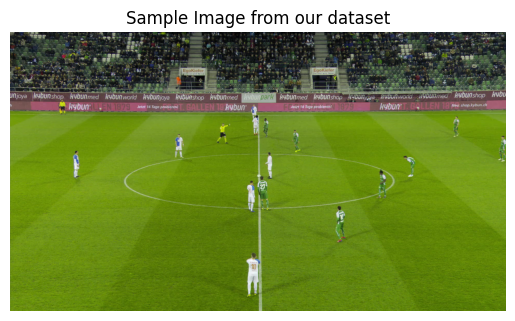

In [ ]:
img_path = "/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-060/img1/000001.jpg"
img = cv2.imread(img_path)  # Read image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

fig, ax = plt.subplots()
ax.imshow(img)
ax.axis("off")
ax.set_title("Sample Image from our dataset")  # Replace with actual class name
plt.show()

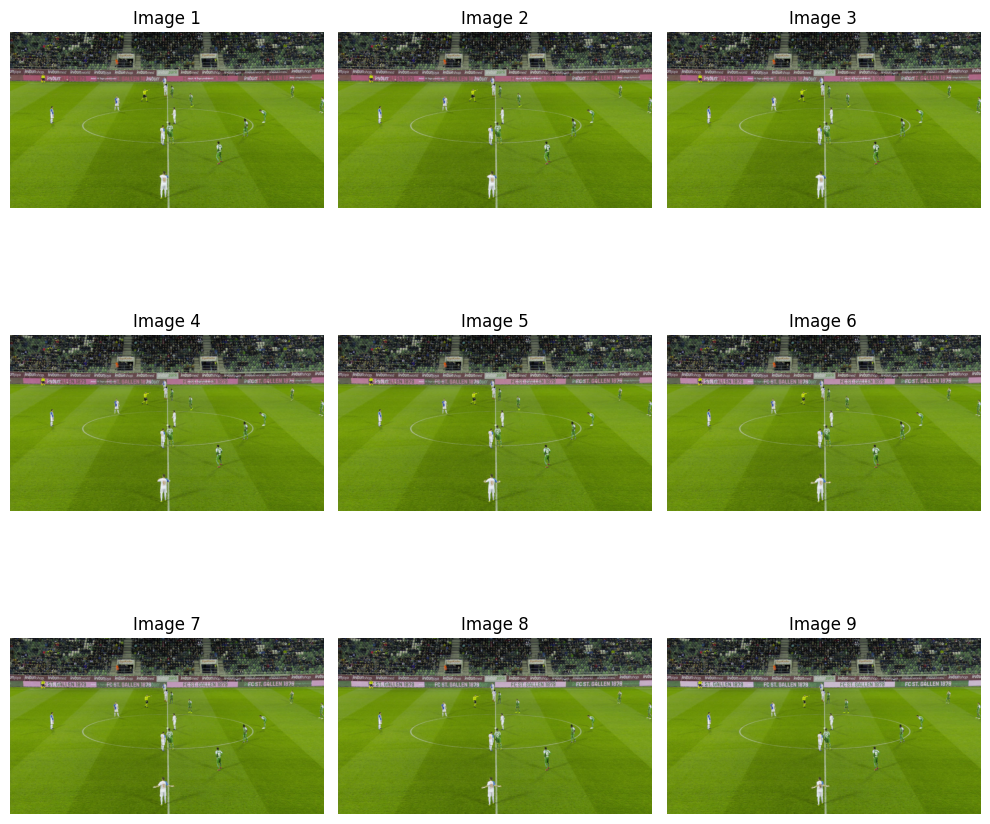

In [ ]:
img_path = "/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-060/img1"

# List the files in the img1 folder
image_files = [f for f in os.listdir(img_path) if os.path.isfile(os.path.join(img_path, f))]

# Select the first 9 image files
image_files = image_files[:9]

# Create a plot to display the images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    if i < len(image_files):
        # Create the full path to the image
        img_path_full = os.path.join(img_path, image_files[i])

        # Open the image
        img = Image.open(img_path_full)

        # Display the image
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"Image {i+1}")

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

4. Check Image Resolutions and Aspect Ratios. If images have varying resolutions, resizing may be needed.

In [ ]:
image_shapes = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    img1_path = os.path.join(folder_path, "img1")

    if os.path.isdir(img1_path):
        sample_images = os.listdir(img1_path)[:3]

        for img_name in sample_images:
            img_path = os.path.join(img1_path, img_name)

            if os.path.isfile(img_path):
                print(f"Checking image: {img_path}")
                try:
                    img = Image.open(img_path)
                    width, height = img.size
                    image_shapes.append((width, height))
                except Exception as e:
                    print(f"Error opening {img_path}: {e}")


unique_shapes = set(image_shapes)

print(f"Unique image resolutions: {unique_shapes}")

Checking image: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-060/img1/000001.jpg
Checking image: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-060/img1/000002.jpg
Checking image: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-060/img1/000003.jpg
Checking image: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-061/img1/000001.jpg
Checking image: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-061/img1/000002.jpg
Checking image: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-061/img1/000003.jpg
Checking image: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-062/img1/000001.jpg
Checking image: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-062/img1/000002.jpg
Checking image: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-062/img1/000003.jpg
Checking image: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-063/img1/000001.jpg
Checking image: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-063/img1

In [ ]:
image_shapes = []  # Store image resolutions
aspect_ratios = []  # Store aspect ratios

img_path = "/content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-060/img1/000002.jpg"
img = Image.open(img_path)

# Get image resolution (width, height)
width, height = img.size
image_shapes.append((width, height))

# Compute aspect ratio
aspect_ratio = round(width / height, 2)  # Round to 2 decimal places
aspect_ratios.append(aspect_ratio)

# Get unique resolutions and aspect ratios
unique_shapes = set(image_shapes)
unique_ratios = set(aspect_ratios)

print(f"Unique image resolutions: {unique_shapes}")
print(f"Unique aspect ratios: {unique_ratios}")


Unique image resolutions: {(1920, 1080)}
Unique aspect ratios: {1.78}


5. Analyze Image Channels (RGB vs. Grayscale). To check if images are grayscale or RGB.

In [ ]:
rgb_count = 0
grayscale_count = 0

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    img1_path = os.path.join(folder_path, "img1")

    if os.path.isdir(img1_path):
        sample_images = os.listdir(img1_path)[:3]

        for img_name in sample_images:
            img_path = os.path.join(img1_path, img_name)

            if os.path.isfile(img_path):
                img = Image.open(img_path)

                if img.mode == "RGB":
                    rgb_count += 1
                else:
                    grayscale_count += 1

print(f"RGB Images: {rgb_count}, Grayscale Images: {grayscale_count}")

RGB Images: 171, Grayscale Images: 0


In [ ]:
rgb_count = 0
grayscale_count = 0

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    img1_path = os.path.join(folder_path, "img1")

    if os.path.isdir(img1_path):
        sample_images = os.listdir(img1_path)

        if sample_images:
            img_path = os.path.join(img1_path, sample_images[0])

            if os.path.isfile(img_path):
                img = Image.open(img_path)

                print(f"Image: {img_path}")
                print(f"Image Pattern: {img.mode}")
                break

Image: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-060/img1/000001.jpg
Image Pattern: RGB


## Splitting the Data

In [ ]:
# Find all folders inside the training folder

training_dirs = sorted(glob.glob(os.path.join(dataset_path, "SNMOT*")))

In [ ]:
count_training_dirs = len(training_dirs)
print(f"Training data: {count_training_dirs}")

Training data: 57


Split data into test and train

In [ ]:
val_dirs = training_dirs[46:]
training_dirs = training_dirs[:46]

In [ ]:
count_training_dirs = len(training_dirs)
count_val_dirs = len(val_dirs)

print(f"Training data: {count_training_dirs}", f"Validation data: {count_val_dirs}")

Training data: 46 Validation data: 11


In [ ]:
split_dirs = {
    'train':training_dirs,
    'validate' : val_dirs
}

# ４ types of labels are used.
labels = ['ball','player','referee','goalkeeper']
label_dict = {'ball':0,'player':1,'referee':2,'goalkeeper':3,'goalkeepers':3}

YOLOV11 Setting

Only three types of files need to be prepared:
* (1) image files
* (2) label files
* (3) configuration files

In [ ]:
DATA_DIR = "/content/drive/MyDrive/FootballDatasetSPAIYOLO"

#(1) image file path
yolo_train_img_dir = f"{DATA_DIR}/images/train"
yolo_val_img_dir = f"{DATA_DIR}/images/val"

#(2) label file path
yolo_train_label_dir = f"{DATA_DIR}/labels/train"
yolo_val_label_dir = f"{DATA_DIR}/labels/val"

#(3) config file path
yaml_file = f'{DATA_DIR}/data.yaml'


os.makedirs(yolo_train_img_dir, exist_ok=True)
os.makedirs(yolo_val_img_dir, exist_ok=True)
os.makedirs(yolo_train_label_dir, exist_ok=True)
os.makedirs(yolo_val_label_dir, exist_ok=True)

In [ ]:
# convert from x,y,w,h to yolo format
def get_yolo_format_bbox(img_w, img_h, box):
    w = box[2]
    h = box[3]
    xc = box[0] + int(np.round(w/2))
    yc = box[1] + int(np.round(h/2))
    box = [xc/img_w, yc/img_h, w/img_w, h/img_h]
    box = [f"{i:.4g}" for i in box]
    return box

In [ ]:
# get SoccerNet label info
def get_info(info):
    results = []
    for line in open(info):
        m = re.match('trackletID_(\d+)= (\S*).*', line.replace(';', ' '))
        if m:
            if m.group(2) not in label_dict:
                continue
            results.append([m.group(1), m.group(2)])
    return pd.DataFrame(results, columns=['id','lbl']).set_index('id').to_dict()['lbl']

In [ ]:
for split in split_dirs:
    if split == 'train':
        yolo_img_dir = yolo_train_img_dir
        yolo_label_dir = yolo_train_label_dir
    else:
        yolo_img_dir = yolo_val_img_dir
        yolo_label_dir = yolo_val_label_dir

    for this_dir in split_dirs[split]:
        print('this_dir:',this_dir)
        video = this_dir.split('/')[-1]
        info = this_dir + '/gameinfo.ini'
        det = this_dir + '/gt/gt.txt'
        info_dict = get_info(info)
        det_df = pd.read_csv(det, names=['frame','player','x','y','w','h','f1','f2','f3','f4'], usecols=['frame','player','x','y','w','h'])
        det_df['label'] = det_df.player.astype(str).map(info_dict)
        det_df['label_id'] = det_df['label'].map(label_dict)
        ng_list = list(det_df[det_df.label_id.isnull()].label.unique())
        if len(ng_list)>0:
            det_df = det_df.dropna()
        for grp, grp_df in det_df.groupby('frame'):
            frame = f'{grp:06}'
            img_file = f'{this_dir}/img1/{frame}.jpg'
            dst_file = f'{yolo_img_dir}/{video}_{frame}.jpg'
            if not os.path.exists(dst_file):
                shutil.copy(img_file, dst_file)
            img = cv2.imread(dst_file)
            height, width, _ = img.shape
            bboxes = []
            for arr in grp_df[['x', 'y', 'w', 'h', 'label_id']].values:
                box = get_yolo_format_bbox(width, height, arr[:4])
                bboxes.append([arr[4]]+box)
            file_name = f'{yolo_label_dir}/{video}_{frame}.txt'
            with open(file_name, 'w') as f:
                for i, bbox in enumerate(bboxes):
                    bbox = [str(i) for i in bbox]
                    str_bbox = ' '.join(bbox)
                    f.write(str_bbox)
                    f.write('\n')

this_dir: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-060
this_dir: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-061
this_dir: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-062
this_dir: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-063
this_dir: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-064
this_dir: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-065
this_dir: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-066
this_dir: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-067
this_dir: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-068
this_dir: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-069
this_dir: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-070
this_dir: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-071
this_dir: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-072
this_dir: /content/drive/MyDrive/FootballDataset-SPAI/train/SNMOT-073
this_dir: /content/d

In [ ]:
# Dump config file
data_yaml = dict(
    train = yolo_train_img_dir,
    val = yolo_val_img_dir,
    nc = 4,
    names = labels
)

with open(yaml_file, 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [ ]:
print(f"YAML file is saved at: {yaml_file}")

YAML file is saved at: /content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml


## Training the Model - 1

In [ ]:
# Load a model
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 65.7MB/s]


In [ ]:
model.info()

YOLO11n summary: 181 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(181, 2624080, 0, 6.614336)

In [ ]:
# Train the model
train_results = model.train(
    data= yaml_file,
    epochs=100,  # Number of training epochs
    imgsz=1280,  # Image size during training
    batch=16,  # Batch size (higher requires more VRAM)
    patience=20,  # Early stopping after 20 epochs without improvement
    save=True,  # Save the model after each epoch
    save_period=10,  # Save the model every epoch
    lr0=0.01,  # Initial learning rate
    lrf=0.2,  # Final learning rate factor (reduces learning rate automatically)
    cos_lr=True,  # Enable **Cosine Annealing** learning rate scheduling
    plots=True,  # Enable training visualization
    verbose=True,  # Print detailed logs
    name="SPAI_MODELONE"  # Experiment name
)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml, epochs=100, time=None, patience=20, batch=16, imgsz=1280, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=SPAI_MODELONE2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

train: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/train.cache... 34500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34500/34500 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]


Plotting labels to runs/detect/SPAI_MODELONE2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to runs/detect/SPAI_MODELONE2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.1G     0.9541     0.4163     0.9623        131       1280: 100%|██████████| 2157/2157 [09:17<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:50<00:00,  5.07it/s]


                   all       8250     135267      0.862      0.816      0.837      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.1G     0.9679     0.4268      0.967        131       1280: 100%|██████████| 2157/2157 [07:41<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:50<00:00,  5.07it/s]


                   all       8250     135267      0.853      0.817      0.835      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.1G     0.9963     0.4421     0.9752        115       1280: 100%|██████████| 2157/2157 [07:34<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:50<00:00,  5.06it/s]


                   all       8250     135267      0.865      0.811      0.834      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      12.1G      1.028     0.4605     0.9874        200       1280: 100%|██████████| 2157/2157 [07:30<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:51<00:00,  5.02it/s]


                   all       8250     135267      0.845      0.803      0.825      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      13.6G      1.028     0.4609     0.9887         71       1280: 100%|██████████| 2157/2157 [07:31<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:51<00:00,  5.05it/s]


                   all       8250     135267      0.859      0.815      0.834      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      13.6G      1.028     0.4609     0.9865         86       1280: 100%|██████████| 2157/2157 [07:32<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:50<00:00,  5.06it/s]


                   all       8250     135267      0.858      0.812      0.833      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      13.6G      1.025     0.4581     0.9865        163       1280: 100%|██████████| 2157/2157 [07:29<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:51<00:00,  4.98it/s]


                   all       8250     135267      0.851      0.806      0.827      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      13.6G      1.026     0.4593     0.9864         87       1280: 100%|██████████| 2157/2157 [07:31<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:51<00:00,  5.02it/s]


                   all       8250     135267      0.861      0.812      0.832      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.6G      1.022     0.4566     0.9842        112       1280: 100%|██████████| 2157/2157 [07:31<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:51<00:00,  5.03it/s]


                   all       8250     135267       0.86      0.821      0.835      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.6G       1.02     0.4556     0.9845        137       1280: 100%|██████████| 2157/2157 [07:33<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:50<00:00,  5.07it/s]


                   all       8250     135267      0.852      0.816      0.833      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      13.6G      1.018     0.4545     0.9839         98       1280: 100%|██████████| 2157/2157 [07:35<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:54<00:00,  4.70it/s]


                   all       8250     135267       0.86      0.819      0.835        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.6G      1.017     0.4542     0.9835        103       1280: 100%|██████████| 2157/2157 [08:31<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [01:04<00:00,  4.01it/s]


                   all       8250     135267      0.863      0.821      0.841      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      13.6G      1.016      0.454     0.9823         92       1280: 100%|██████████| 2157/2157 [08:26<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:58<00:00,  4.43it/s]


                   all       8250     135267      0.861      0.817      0.837      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      13.6G      1.014     0.4525     0.9816        119       1280: 100%|██████████| 2157/2157 [08:15<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:58<00:00,  4.43it/s]


                   all       8250     135267      0.861      0.821      0.838      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      13.6G      1.011     0.4506     0.9819        129       1280: 100%|██████████| 2157/2157 [08:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:57<00:00,  4.45it/s]


                   all       8250     135267      0.858      0.822       0.84      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      13.6G      1.008     0.4485     0.9799        130       1280: 100%|██████████| 2157/2157 [08:21<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:55<00:00,  4.68it/s]


                   all       8250     135267      0.861      0.821       0.84      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      13.6G      1.007     0.4482     0.9799        107       1280: 100%|██████████| 2157/2157 [08:22<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:57<00:00,  4.45it/s]


                   all       8250     135267      0.857      0.819      0.838      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      13.6G      1.005      0.447      0.978        131       1280: 100%|██████████| 2157/2157 [08:26<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:54<00:00,  4.75it/s]


                   all       8250     135267       0.86      0.821      0.838      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      13.6G      1.002     0.4446     0.9779        123       1280: 100%|██████████| 2157/2157 [08:32<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:51<00:00,  5.06it/s]


                   all       8250     135267      0.859      0.822      0.839      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      14.3G     0.9994     0.4457      0.977        199       1280: 100%|██████████| 2157/2157 [08:37<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:58<00:00,  4.40it/s]


                   all       8250     135267      0.862       0.82      0.838      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      14.3G     0.9989     0.4452     0.9765        127       1280: 100%|██████████| 2157/2157 [08:32<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:58<00:00,  4.42it/s]


                   all       8250     135267      0.862      0.822      0.838      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      14.3G      0.995     0.4426     0.9756         63       1280: 100%|██████████| 2157/2157 [08:23<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [01:02<00:00,  4.15it/s]


                   all       8250     135267      0.865      0.823      0.839      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.3G     0.9949     0.4435     0.9754         98       1280: 100%|██████████| 2157/2157 [08:32<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:55<00:00,  4.67it/s]


                   all       8250     135267      0.866      0.822       0.84      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      14.3G     0.9932     0.4412     0.9749         94       1280: 100%|██████████| 2157/2157 [07:56<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:51<00:00,  5.04it/s]


                   all       8250     135267      0.863      0.823      0.839      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      14.3G     0.9895     0.4388     0.9727        122       1280: 100%|██████████| 2157/2157 [07:33<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:51<00:00,  5.04it/s]


                   all       8250     135267       0.86      0.824      0.838      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      14.3G      0.988     0.4384      0.972        192       1280: 100%|██████████| 2157/2157 [07:31<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:51<00:00,  4.96it/s]


                   all       8250     135267       0.86      0.825      0.837      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      14.3G     0.9894     0.4394     0.9734        122       1280: 100%|██████████| 2157/2157 [07:33<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:51<00:00,  5.04it/s]


                   all       8250     135267       0.86      0.825      0.839      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      14.3G     0.9858     0.4377     0.9721         89       1280: 100%|██████████| 2157/2157 [07:34<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:51<00:00,  5.03it/s]


                   all       8250     135267      0.861      0.824      0.839      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      14.3G     0.9838     0.4363     0.9702        168       1280: 100%|██████████| 2157/2157 [07:43<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:50<00:00,  5.06it/s]


                   all       8250     135267      0.859      0.827       0.84      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      14.3G     0.9827     0.4351     0.9711        145       1280: 100%|██████████| 2157/2157 [08:32<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:56<00:00,  4.57it/s]


                   all       8250     135267       0.86      0.826       0.84      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      14.3G     0.9802     0.4342     0.9679        127       1280: 100%|██████████| 2157/2157 [07:58<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:54<00:00,  4.76it/s]


                   all       8250     135267       0.86      0.826       0.84      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      14.3G     0.9789      0.434     0.9694         69       1280: 100%|██████████| 2157/2157 [08:31<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:59<00:00,  4.35it/s]


                   all       8250     135267      0.861      0.826       0.84      0.502
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 12, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

32 epochs completed in 4.773 hours.
Optimizer stripped from runs/detect/SPAI_MODELONE2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/SPAI_MODELONE2/weights/best.pt, 5.5MB

Validating runs/detect/SPAI_MODELONE2/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [01:16<00:00,  3.35it/s]


                   all       8250     135267      0.862      0.821       0.84      0.504
                  ball       7833       8241      0.659      0.472      0.474      0.166
                player       8250     110512       0.95      0.966      0.973      0.648
               referee       7685      12363      0.902      0.938      0.956      0.608
            goalkeeper       4151       4151      0.938      0.907      0.958      0.594
Speed: 0.3ms preprocess, 1.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/SPAI_MODELONE2


In [ ]:
data = {
    "Class": ["all", "ball", "player", "referee", "goalkeeper"],
    "Images": [8250, 7833, 8250, 7685, 4151],
    "Instances": [135267, 8241, 110512, 12363, 4151],
    "Precision": [0.862, 0.659, 0.95, 0.902, 0.938],
    "Recall": [0.821, 0.472, 0.966, 0.938, 0.907],
    "mAP50": [0.84, 0.474, 0.973, 0.956, 0.958],
    "mAP50-95": [0.504, 0.166, 0.648, 0.608, 0.594]
}


df = pd.DataFrame(data)


print(df.to_string(index=False))


     Class  Images  Instances  Precision  Recall  mAP50  mAP50-95
       all    8250     135267      0.862   0.821  0.840     0.504
      ball    7833       8241      0.659   0.472  0.474     0.166
    player    8250     110512      0.950   0.966  0.973     0.648
   referee    7685      12363      0.902   0.938  0.956     0.608
goalkeeper    4151       4151      0.938   0.907  0.958     0.594


## Evaluation - 1
There are several ways to evaluation for data:




#### Evaluating the Model

In [ ]:
metrics = model.val(data= yaml_file, imgsz=1280, conf=0.5, batch=16)


print(metrics)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:38<00:00,  3.26it/s]


                   all       8250     135267      0.912      0.728       0.82      0.528
                  ball       7833       8241      0.744      0.286      0.503      0.223
                player       8250     110512      0.973      0.928       0.95      0.659
               referee       7685      12363      0.952      0.871      0.921      0.624
            goalkeeper       4151       4151      0.977      0.828      0.908      0.607
Speed: 0.3ms preprocess, 1.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/SPAI_MODELONE22
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x780e50ef71d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.

In [ ]:
metrics_1 = model.val(data= yaml_file, imgsz=1280, conf=0.5, batch=16)


print(metrics_1)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:42<00:00,  3.17it/s]


                   all       8250     135267      0.912      0.728       0.82      0.528
                  ball       7833       8241      0.744      0.286      0.503      0.223
                player       8250     110512      0.973      0.928       0.95      0.659
               referee       7685      12363      0.952      0.871      0.921      0.624
            goalkeeper       4151       4151      0.977      0.828      0.908      0.607
Speed: 0.3ms preprocess, 1.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/SPAI_MODELONE24
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x780e53f98a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.

In [ ]:
precision_per_class = metrics_1.box.p
recall_per_class = metrics_1.box.r
f1_per_class = metrics_1.box.f1


print("Precision per Class:", metrics_1.box.p)
print("Recall per Class:", metrics_1.box.r)
print("F1-score per Class:", metrics_1.box.f1)

Precision per Class: [    0.74386     0.97343     0.95217     0.97724]
Recall per Class: [    0.28649      0.9284     0.87107     0.82751]
F1-score per Class: [    0.41367     0.95038     0.90981     0.89616]


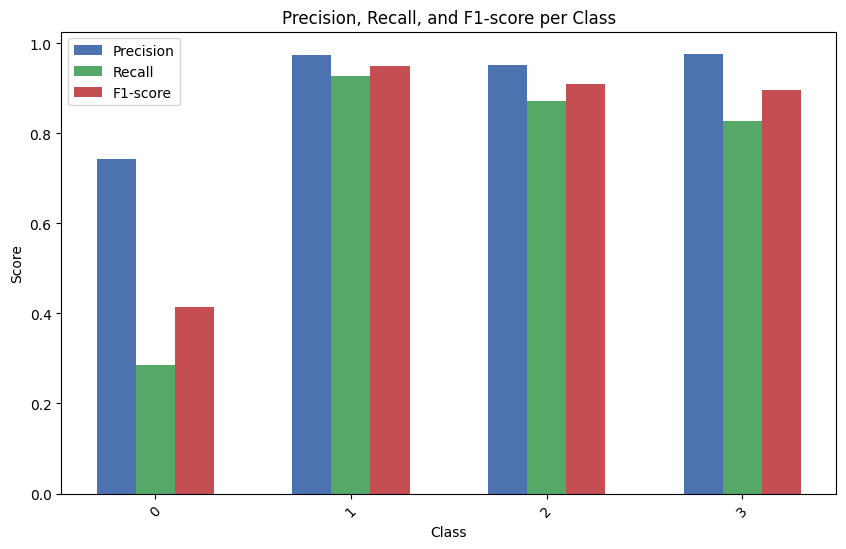

In [ ]:
labels = metrics_1.names
precision_per_class = metrics_1.box.p
recall_per_class = metrics_1.box.r
f1_per_class = metrics_1.box.f1

x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, precision_per_class, width=0.2, label="Precision", color="b")
plt.bar(x, recall_per_class, width=0.2, label="Recall", color="g")
plt.bar(x + 0.2, f1_per_class, width=0.2, label="F1-score", color="r")

plt.xlabel("Class")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-score per Class")
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.show()

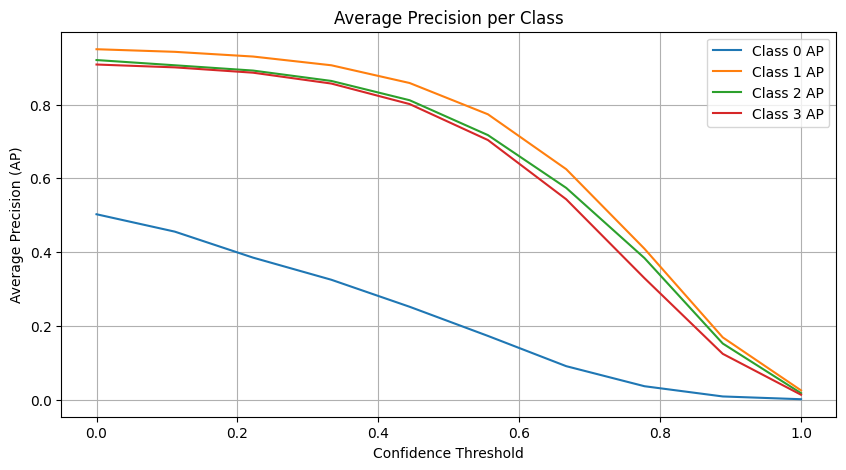

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(np.linspace(0, 1, 10), metrics_1.box.all_ap[i], label=f"Class {i} AP")

plt.xlabel("Confidence Threshold")
plt.ylabel("Average Precision (AP)")
plt.title("Average Precision per Class")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
iou_50 = metrics_1.box.map50
map_50 = metrics_1.box.map50
map_50_95 = metrics_1.box.map
precision = metrics_1.box.mp
recall = metrics_1.box.mr
f1_score = 2 * (precision * recall) / (precision + recall)


print(f"IoU@50: {iou_50:.4f}")
print(f"mAP@50: {map_50:.4f}")
print(f"mAP@50-95: {map_50_95:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

IoU@50: 0.8204
mAP@50: 0.8204
mAP@50-95: 0.5281
Precision: 0.9117
Recall: 0.7284
F1 Score: 0.8098


In [ ]:
metrics_2 = model.val(data= yaml_file, imgsz=640, conf=0.5, batch=16)

print(metrics_2)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:42<00:00,  3.17it/s]


                   all       8250     135267      0.884       0.58      0.734      0.433
                  ball       7833       8241      0.668     0.0535      0.357      0.126
                player       8250     110512      0.968      0.902      0.934      0.609
               referee       7685      12363      0.957      0.764      0.866      0.548
            goalkeeper       4151       4151      0.942      0.599      0.779      0.449
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/SPAI_MODELONE25
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x780e2eb2e090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.

In [ ]:
precision_per_class = metrics_2.box.p
recall_per_class = metrics_2.box.r
f1_per_class = metrics_2.box.f1


print("Precision per Class:", metrics_2.box.p)
print("Recall per Class:", metrics_2.box.r)
print("F1-score per Class:", metrics_2.box.f1)

Precision per Class: [    0.66818     0.96834     0.95704     0.94205]
Recall per Class: [   0.053513     0.90199     0.76405     0.59913]
F1-score per Class: [    0.09909     0.93399     0.84973     0.73244]


In [ ]:
iou_50 = metrics_2.box.map50
map_50 = metrics_2.box.map50
map_50_95 = metrics_2.box.map
precision = metrics_2.box.mp
recall = metrics_2.box.mr
f1_score = 2 * (precision * recall) / (precision + recall)


print(f"IoU@50: {iou_50:.4f}")
print(f"mAP@50: {map_50:.4f}")
print(f"mAP@50-95: {map_50_95:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

IoU@50: 0.7340
mAP@50: 0.7340
mAP@50-95: 0.4329
Precision: 0.8839
Recall: 0.5797


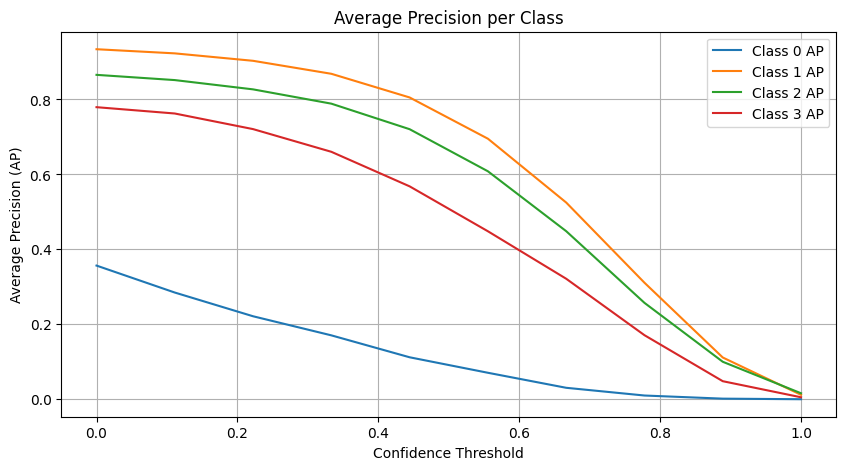

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(np.linspace(0, 1, 10), metrics_2.box.all_ap[i], label=f"Class {i} AP")

plt.xlabel("Confidence Threshold")
plt.ylabel("Average Precision (AP)")
plt.title("Average Precision per Class")
plt.legend()
plt.grid(True)
plt.show()

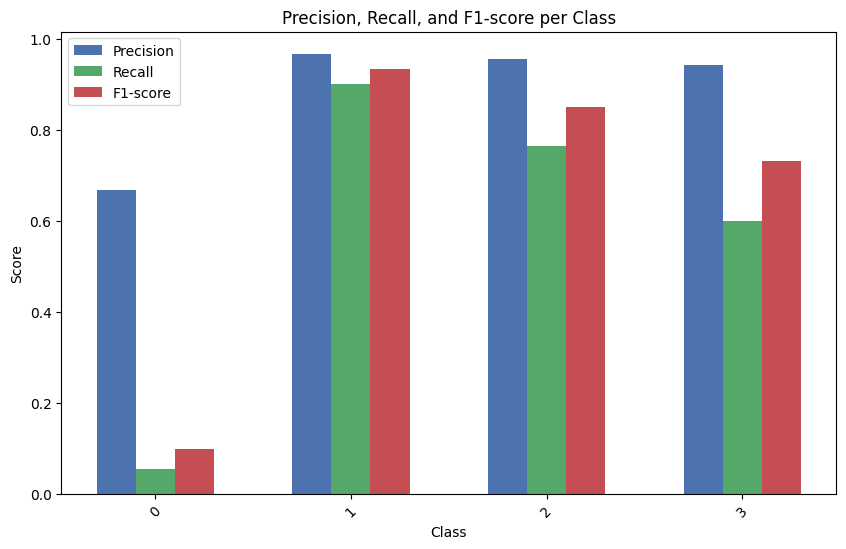

In [ ]:
labels = metrics_2.names
precision_per_class = metrics_2.box.p
recall_per_class = metrics_2.box.r
f1_per_class = 2 * (precision_per_class * recall_per_class) / (precision_per_class + recall_per_class + 1e-6)  # تجنب القسمة على صفر

x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, precision_per_class, width=0.2, label="Precision", color="b")
plt.bar(x, recall_per_class, width=0.2, label="Recall", color="g")
plt.bar(x + 0.2, f1_per_class, width=0.2, label="F1-score", color="r")

plt.xlabel("Class")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-score per Class")
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.show()

In [ ]:
print(vars(metrics.box))

{'p': array([    0.74386,     0.97343,     0.95217,     0.97724]), 'r': array([    0.28649,      0.9284,     0.87107,     0.82751]), 'f1': array([    0.41367,     0.95038,     0.90981,     0.89616]), 'all_ap': array([[     0.5025,     0.45537,     0.38486,     0.32487,     0.25162,     0.17262,    0.090594,    0.036212,   0.0084687,  0.00096874],
       [    0.94996,     0.94291,     0.93013,     0.90643,     0.85834,     0.77354,     0.62473,     0.40898,      0.1686,    0.024921],
       [    0.92061,     0.90642,     0.89209,     0.86395,     0.81164,     0.71709,     0.57399,     0.38364,     0.15197,     0.01731],
       [    0.90849,     0.90077,     0.88632,     0.85687,     0.80123,     0.70372,     0.54313,     0.32916,     0.12402,    0.013053]]), 'ap_class_index': array([0, 1, 2, 3]), 'nc': 4, 'p_curve': array([[    0.74386,     0.74386,     0.74386, ...,           1,           1,           1],
       [    0.97343,     0.97343,     0.97343, ...,           1,           1,    

## Training the Model - 2

In [ ]:
# Load a model
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.1MB/s]


In [ ]:
#Test_V1_ep90

# Train the model
train_results_V2 = model.train(
    data="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml",
    epochs=90,  # Number of training epochs
    imgsz=640,  # Image size during training
    batch=16,  # Batch size (higher requires more VRAM)
    patience=15,  # Early stopping after 15 epochs without improvement
    save=True,  # Save the model after each epoch
    save_period=5,  # Save the model every 10 epochs
    #lr0=0.007,  # Initial learning rate
    #lrf=0.2,  # Final learning rate factor (reduces learning rate automatically)
    #warmup_epochs=3,
    #cos_lr=True,  # Enable Cosine Annealing learning rate scheduling
    plots=True,  # Enable training visualization
    verbose=True,  # Print detailed logs
    augment=True,  # Enable data augmentation
    scale=1.0,  # Apply scaling augmentation
    hsv_h=0.015,  # Adjust hue variations
    hsv_s=0.7,  # Adjust saturation variations
    hsv_v=0.4,  # Adjust brightness variations
    model="yolo11n.pt",  # Add model path
    name="/content/drive/MyDrive/model/SPAI_MODELONE_v2_v2finaly"  # Experiment name
)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml, epochs=90, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=None, name=SPAI_MODELONE_v2_v2finaly, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

100%|██████████| 755k/755k [00:00<00:00, 17.7MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/train.cache... 34500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34500/34500 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/model/SPAI_MODELONE_v2_v2finaly/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/model/SPAI_MODELONE_v2_v2finaly
Starting training for 90 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/90      3.64G      1.605      1.166     0.9976        141        640: 100%|██████████| 2157/2157 [57:31<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:46<00:00,  5.57it/s]


                   all       8250     135267      0.648       0.57      0.633      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/90      3.91G      1.534     0.8494     0.9561        142        640: 100%|██████████| 2157/2157 [04:38<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:43<00:00,  5.92it/s]


                   all       8250     135267      0.792      0.628      0.677      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/90      4.27G      1.515     0.7842     0.9454        131        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.06it/s]


                   all       8250     135267      0.816      0.659      0.697      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/90      4.27G      1.487     0.7393     0.9389        133        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.10it/s]


                   all       8250     135267      0.824       0.66      0.704      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/90      4.27G      1.434     0.6991     0.9289         56        640: 100%|██████████| 2157/2157 [04:30<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.08it/s]


                   all       8250     135267      0.784       0.67      0.713      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/90      4.27G      1.407     0.6775     0.9215         98        640: 100%|██████████| 2157/2157 [04:30<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.15it/s]


                   all       8250     135267      0.819      0.688      0.725      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/90      4.27G      1.385     0.6611     0.9175        175        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.13it/s]


                   all       8250     135267       0.81      0.693      0.725      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/90      4.27G       1.37     0.6516      0.914         98        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.11it/s]


                   all       8250     135267      0.805      0.696       0.73      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/90      4.27G      1.355     0.6409     0.9114        114        640: 100%|██████████| 2157/2157 [04:30<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.03it/s]


                   all       8250     135267      0.811      0.707      0.736      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/90      4.27G      1.341     0.6313     0.9098         73        640: 100%|██████████| 2157/2157 [04:30<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.08it/s]


                   all       8250     135267      0.817      0.703      0.738      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/90      4.27G      1.329     0.6231     0.9066        106        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.12it/s]


                   all       8250     135267       0.83      0.713      0.743      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/90      4.27G      1.319     0.6165      0.906        101        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.13it/s]


                   all       8250     135267      0.829       0.71      0.745      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/90      4.27G      1.311     0.6113     0.9044        143        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.11it/s]


                   all       8250     135267      0.832      0.715      0.748      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/90      4.27G      1.299     0.6037      0.902        136        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.06it/s]


                   all       8250     135267      0.828      0.718       0.75      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/90      4.46G      1.292      0.599     0.9019        107        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.12it/s]


                   all       8250     135267      0.832      0.716       0.75      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/90      4.46G      1.286     0.5936     0.8993        118        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.10it/s]


                   all       8250     135267      0.832      0.717       0.75      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/90      4.46G      1.277      0.587     0.8991        129        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.09it/s]


                   all       8250     135267      0.835       0.72      0.753      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/90      4.46G      1.274     0.5852     0.8979         65        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.09it/s]


                   all       8250     135267      0.833      0.721      0.754       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/90      4.46G      1.262     0.5788     0.8956        130        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.01it/s]


                   all       8250     135267      0.832      0.722      0.754      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/90      4.46G      1.259     0.5769     0.8962        193        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.11it/s]


                   all       8250     135267      0.828      0.721      0.753      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/90      4.46G      1.256     0.5752     0.8955         85        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.08it/s]


                   all       8250     135267      0.827      0.724      0.755      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/90      4.46G      1.248     0.5681     0.8939         53        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.08it/s]


                   all       8250     135267      0.834      0.724      0.755      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/90      4.46G      1.249     0.5696      0.894         94        640: 100%|██████████| 2157/2157 [04:35<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.09it/s]


                   all       8250     135267      0.833      0.725      0.756      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/90      4.46G      1.241     0.5655     0.8935        135        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267      0.835      0.726      0.757      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/90      4.46G      1.238     0.5617     0.8922        122        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.08it/s]


                   all       8250     135267      0.833      0.727      0.757      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/90      4.46G      1.234     0.5595     0.8919        151        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.10it/s]


                   all       8250     135267      0.835      0.727      0.758      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/90      4.46G       1.23      0.557     0.8912         60        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.15it/s]


                   all       8250     135267      0.838      0.727      0.759      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/90      4.46G      1.227     0.5566     0.8912         82        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.08it/s]


                   all       8250     135267       0.84      0.728       0.76      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/90      4.46G      1.223     0.5541     0.8892        182        640: 100%|██████████| 2157/2157 [04:30<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.12it/s]


                   all       8250     135267      0.838      0.728       0.76      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/90      4.46G       1.22     0.5512     0.8886        185        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.12it/s]


                   all       8250     135267      0.838      0.728       0.76      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/90      4.46G      1.217     0.5497     0.8883        118        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.08it/s]


                   all       8250     135267      0.838      0.728       0.76      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/90      4.46G      1.215     0.5487     0.8884        101        640: 100%|██████████| 2157/2157 [04:30<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.10it/s]


                   all       8250     135267      0.837      0.729       0.76      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/90      4.46G      1.208     0.5455     0.8879        116        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.06it/s]


                   all       8250     135267      0.839      0.729       0.76      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/90      4.46G      1.208     0.5446     0.8868         85        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.09it/s]


                   all       8250     135267      0.838      0.728       0.76      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/90      4.46G      1.205     0.5426     0.8868        124        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.03it/s]


                   all       8250     135267      0.837      0.728       0.76      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/90      4.46G      1.201     0.5399     0.8863        131        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.09it/s]


                   all       8250     135267      0.836      0.728       0.76      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/90      4.46G      1.197     0.5384     0.8848        179        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.08it/s]


                   all       8250     135267      0.837      0.728       0.76      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/90      4.46G      1.196     0.5378     0.8848         75        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.02it/s]


                   all       8250     135267      0.837      0.729       0.76      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/90      4.46G      1.194     0.5374     0.8847        102        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.15it/s]


                   all       8250     135267      0.836      0.729       0.76      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/90      4.46G       1.19     0.5333     0.8846         85        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.11it/s]


                   all       8250     135267      0.836      0.729      0.761       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/90      4.46G      1.186     0.5327     0.8831        113        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.13it/s]


                   all       8250     135267      0.835       0.73      0.761       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/90      4.46G      1.186     0.5311     0.8843        119        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.12it/s]


                   all       8250     135267      0.836       0.73      0.761       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/90      4.46G      1.183     0.5289     0.8819         85        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.14it/s]


                   all       8250     135267      0.837       0.73      0.761       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/90      4.46G      1.182     0.5278      0.883        132        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.15it/s]


                   all       8250     135267      0.837       0.73      0.761       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/90      4.46G      1.176     0.5253     0.8814        143        640: 100%|██████████| 2157/2157 [04:30<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.15it/s]


                   all       8250     135267      0.835      0.731      0.762       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/90      4.46G      1.175     0.5238     0.8804        118        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.10it/s]


                   all       8250     135267      0.836      0.731      0.762      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/90      4.46G      1.171     0.5228     0.8804        177        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.07it/s]


                   all       8250     135267      0.838       0.73      0.762      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/90      4.46G      1.168     0.5202     0.8808        150        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.12it/s]


                   all       8250     135267      0.838       0.73      0.762      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/90      4.46G      1.165     0.5181     0.8799        139        640: 100%|██████████| 2157/2157 [04:30<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.13it/s]


                   all       8250     135267      0.837       0.73      0.762      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/90      4.46G      1.163     0.5165     0.8791        123        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.09it/s]


                   all       8250     135267      0.836      0.731      0.762      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/90      4.46G      1.161     0.5174     0.8786        155        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.15it/s]


                   all       8250     135267      0.836       0.73      0.762      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/90      4.46G      1.155     0.5143     0.8791         84        640: 100%|██████████| 2157/2157 [04:30<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.02it/s]


                   all       8250     135267      0.837       0.73      0.762      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/90      4.46G       1.16     0.5161     0.8795        104        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.16it/s]


                   all       8250     135267      0.835       0.73      0.761      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/90      4.46G      1.154     0.5138     0.8775         22        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.13it/s]


                   all       8250     135267      0.835       0.73      0.762      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/90      4.46G      1.152     0.5125      0.877         56        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.08it/s]


                   all       8250     135267      0.835      0.731      0.762      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/90      4.46G      1.146     0.5085      0.876        219        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.12it/s]


                   all       8250     135267      0.836      0.731      0.762      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/90      4.46G      1.146     0.5082      0.876         84        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.15it/s]


                   all       8250     135267      0.835      0.731      0.762      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/90      4.46G      1.146     0.5069     0.8759         95        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.12it/s]


                   all       8250     135267      0.835      0.731      0.762      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/90      4.46G       1.14     0.5043     0.8753         64        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.09it/s]


                   all       8250     135267      0.836      0.731      0.763      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/90      4.46G      1.137     0.5036     0.8749         24        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.04it/s]


                   all       8250     135267      0.838      0.731      0.763      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/90      4.46G      1.138     0.5029     0.8752        117        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.14it/s]


                   all       8250     135267      0.837      0.731      0.763      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/90      4.46G      1.135     0.5018     0.8744         95        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.12it/s]


                   all       8250     135267      0.837      0.731      0.763      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/90      4.46G       1.13     0.4999     0.8732        140        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.12it/s]


                   all       8250     135267      0.836      0.732      0.763      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/90      4.46G      1.129     0.4985     0.8729         99        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.09it/s]


                   all       8250     135267      0.834      0.732      0.763      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/90      4.46G      1.126     0.4966     0.8715        146        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.06it/s]


                   all       8250     135267      0.835      0.733      0.764      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/90      4.46G      1.122     0.4955     0.8723        195        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.14it/s]


                   all       8250     135267      0.835      0.733      0.764      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/90      4.46G      1.117     0.4941     0.8709         38        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.09it/s]


                   all       8250     135267      0.837      0.733      0.764      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/90      4.46G      1.118     0.4922     0.8703        103        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.12it/s]


                   all       8250     135267      0.836      0.733      0.764      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/90      4.46G      1.113     0.4904     0.8708         65        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.06it/s]


                   all       8250     135267      0.836      0.733      0.764      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/90      4.46G      1.111     0.4888     0.8692        156        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.01it/s]


                   all       8250     135267       0.84      0.733      0.764      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/90      4.46G      1.111     0.4887     0.8699        152        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.12it/s]


                   all       8250     135267      0.838      0.733      0.764      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/90      4.46G      1.107     0.4869     0.8699        103        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.09it/s]


                   all       8250     135267       0.84      0.732      0.764      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/90      4.46G      1.103     0.4843     0.8695        141        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.03it/s]


                   all       8250     135267      0.839      0.732      0.764      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/90      4.46G      1.101     0.4836     0.8687         88        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.09it/s]


                   all       8250     135267      0.838      0.733      0.764      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/90      4.46G      1.099     0.4815     0.8687        172        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.09it/s]


                   all       8250     135267      0.838      0.733      0.764      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/90      4.46G      1.095     0.4799     0.8668         77        640: 100%|██████████| 2157/2157 [04:34<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.07it/s]


                   all       8250     135267       0.84      0.733      0.765      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/90      4.46G      1.089     0.4763     0.8667         91        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.03it/s]


                   all       8250     135267      0.839      0.733      0.765      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/90      4.46G      1.087     0.4753     0.8656         90        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.12it/s]


                   all       8250     135267      0.839      0.734      0.765      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/90      4.46G      1.088     0.4765     0.8662        167        640: 100%|██████████| 2157/2157 [04:32<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.10it/s]


                   all       8250     135267      0.837      0.734      0.765      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/90      4.46G      1.084     0.4735     0.8654        109        640: 100%|██████████| 2157/2157 [04:33<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.12it/s]


                   all       8250     135267      0.836      0.735      0.765      0.445
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      81/90      4.46G      1.023     0.4469     0.8799         55        640: 100%|██████████| 2157/2157 [04:31<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.03it/s]


                   all       8250     135267      0.836      0.735      0.765      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      82/90      4.46G      1.014     0.4419     0.8767         53        640: 100%|██████████| 2157/2157 [04:29<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:43<00:00,  5.99it/s]


                   all       8250     135267      0.837      0.734      0.765      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      83/90      4.46G      1.008      0.439     0.8763         61        640: 100%|██████████| 2157/2157 [04:30<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.07it/s]


                   all       8250     135267      0.839      0.734      0.765      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      84/90      4.46G      1.003     0.4356     0.8747         71        640: 100%|██████████| 2157/2157 [04:30<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.07it/s]


                   all       8250     135267      0.839      0.735      0.765      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      85/90      4.46G     0.9941     0.4325      0.873         63        640: 100%|██████████| 2157/2157 [04:29<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:43<00:00,  5.99it/s]


                   all       8250     135267      0.841      0.734      0.765      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      86/90      4.46G     0.9912     0.4303     0.8725         61        640: 100%|██████████| 2157/2157 [04:30<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:43<00:00,  6.00it/s]


                   all       8250     135267      0.843      0.734      0.765      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      87/90      4.46G     0.9841     0.4269      0.871         66        640: 100%|██████████| 2157/2157 [04:29<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.04it/s]


                   all       8250     135267      0.843      0.734      0.765      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      88/90      4.46G     0.9826     0.4258      0.871         47        640: 100%|██████████| 2157/2157 [04:29<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.06it/s]


                   all       8250     135267      0.843      0.734      0.766      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      89/90      4.46G     0.9781     0.4233      0.869         60        640: 100%|██████████| 2157/2157 [04:29<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.04it/s]


                   all       8250     135267      0.843      0.734      0.765      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      90/90      4.46G     0.9728     0.4207     0.8691         54        640: 100%|██████████| 2157/2157 [04:29<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.06it/s]


                   all       8250     135267      0.844      0.734      0.765      0.444

90 epochs completed in 8.770 hours.
Optimizer stripped from /content/drive/MyDrive/model/SPAI_MODELONE_v2_v2finaly/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/model/SPAI_MODELONE_v2_v2finaly/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/model/SPAI_MODELONE_v2_v2finaly/weights/best.pt...
Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [01:08<00:00,  3.74it/s]


                   all       8250     135267      0.771      0.728      0.747      0.427
                  ball       7833       8241      0.534       0.12      0.172     0.0509
                player       8250     110512       0.91      0.956      0.958      0.603
               referee       7685      12363      0.839      0.925      0.936      0.551
            goalkeeper       4151       4151      0.802      0.911      0.921      0.502
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/drive/MyDrive/model/SPAI_MODELONE_v2_v2finaly


## Training the Model - 3

In [ ]:
#Test_V2_ep70  الافضل
# Train the model
train_results_V2 = model.train(
    data="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml",
    epochs=70,  # Number of training epochs
    imgsz=640,  # Image size during training
    batch=16,  # Batch size (higher requires more VRAM)
    patience=15,  # Early stopping after 15 epochs without improvement
    save=True,  # Save the model after each epoch
    save_period=5,  # Save the model every 10 epochs
    lr0=0.007,  # Initial learning rate
    lrf=0.2,  # Final learning rate factor (reduces learning rate automatically)
    warmup_epochs=3,
    cos_lr=True,  # Enable Cosine Annealing learning rate scheduling
    plots=True,  # Enable training visualization
    verbose=True,  # Print detailed logs
    augment=True,  # Enable data augmentation
    scale=0.5,  # Apply scaling augmentation
    hsv_h=0.015,  # Adjust hue variations
    hsv_s=0.7,  # Adjust saturation variations
    hsv_v=0.4,  # Adjust brightness variations
    model="yolo11n.pt",  # Add model path
    name="SPAI_MODELONE_v2_v2"  # Experiment name
)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml, epochs=70, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=None, name=SPAI_MODELONE_v2_v2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/train.cache... 34500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34500/34500 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]


Plotting labels to runs/detect/SPAI_MODELONE_v2_v2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.007' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/SPAI_MODELONE_v2_v2
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      3.05G       1.53      1.071     0.9635        128        640: 100%|██████████| 2157/2157 [24:14<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:44<00:00,  5.75it/s]


                   all       8250     135267      0.893      0.591      0.644      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      3.14G      1.454     0.7841      0.929        130        640: 100%|██████████| 2157/2157 [04:29<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:43<00:00,  5.98it/s]


                   all       8250     135267      0.802       0.64      0.683      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      3.14G      1.433     0.7326     0.9212        114        640: 100%|██████████| 2157/2157 [04:24<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.16it/s]


                   all       8250     135267      0.821      0.659      0.703      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      3.14G      1.396     0.6881     0.9141        199        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.818      0.663      0.707      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      3.14G      1.346     0.6483     0.9046         71        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.21it/s]


                   all       8250     135267      0.813      0.674      0.716      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      3.14G      1.317      0.624      0.898         86        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.21it/s]


                   all       8250     135267      0.817      0.701       0.73      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      3.14G      1.292     0.6061     0.8933        163        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.20it/s]


                   all       8250     135267      0.812      0.708      0.735      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      3.14G      1.274     0.5938     0.8902         85        640: 100%|██████████| 2157/2157 [04:22<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.25it/s]


                   all       8250     135267      0.835      0.703      0.739      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      3.14G      1.257     0.5822     0.8867        112        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.823      0.708      0.741      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      3.14G      1.243     0.5733     0.8851        136        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267       0.81      0.713       0.74      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      3.14G       1.23      0.566     0.8823         98        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.22it/s]


                   all       8250     135267      0.825      0.718      0.748      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      3.14G      1.222      0.561      0.881        103        640: 100%|██████████| 2157/2157 [04:22<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.821      0.719      0.747      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      3.14G      1.213     0.5545     0.8791         91        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.22it/s]


                   all       8250     135267      0.826      0.717      0.749       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      3.14G      1.204     0.5494     0.8773        119        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.16it/s]


                   all       8250     135267      0.826      0.721      0.749      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      3.32G      1.197     0.5449     0.8765        128        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267      0.836      0.719      0.751       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      3.32G       1.19     0.5406     0.8749        130        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.25it/s]


                   all       8250     135267      0.822      0.724       0.75      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      3.32G      1.182      0.536     0.8739        105        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.16it/s]


                   all       8250     135267      0.824      0.726      0.753      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      3.32G      1.178     0.5337     0.8725        131        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.22it/s]


                   all       8250     135267       0.83      0.723      0.752      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      3.32G      1.169     0.5274     0.8713        118        640: 100%|██████████| 2157/2157 [04:22<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.21it/s]


                   all       8250     135267      0.832      0.724      0.752      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      3.51G      1.164     0.5265     0.8711        197        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.836      0.723      0.753      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      3.51G       1.16     0.5246       0.87        125        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.05it/s]


                   all       8250     135267      0.833      0.724      0.754      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      3.51G      1.152     0.5196      0.869         63        640: 100%|██████████| 2157/2157 [04:23<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.25it/s]


                   all       8250     135267      0.835      0.724      0.754      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      3.51G      1.151     0.5197     0.8685         98        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.26it/s]


                   all       8250     135267      0.831      0.726      0.754      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      3.51G      1.144     0.5161     0.8677         94        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267      0.839      0.724      0.755      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      3.51G      1.139     0.5125     0.8661        121        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.839      0.724      0.755      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      3.51G      1.134     0.5089     0.8655        191        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.25it/s]


                   all       8250     135267       0.84      0.725      0.755      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      3.51G      1.132     0.5084     0.8653        120        640: 100%|██████████| 2157/2157 [04:22<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.25it/s]


                   all       8250     135267      0.841      0.725      0.756      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      3.51G      1.128     0.5067     0.8648         89        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.26it/s]


                   all       8250     135267       0.84      0.726      0.757      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      3.51G      1.122     0.5031     0.8636        168        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.18it/s]


                   all       8250     135267      0.839      0.726      0.757      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      3.51G      1.118     0.5006     0.8629        144        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267      0.834      0.728      0.757      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      3.51G      1.113     0.4983     0.8614        124        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.22it/s]


                   all       8250     135267      0.837      0.728      0.757      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      3.51G       1.11     0.4978     0.8617         70        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.835      0.728      0.757      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      3.51G      1.103     0.4934     0.8612         95        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.27it/s]


                   all       8250     135267      0.835      0.729      0.758      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      3.51G      1.102      0.492     0.8606         92        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.21it/s]


                   all       8250     135267      0.834      0.729      0.758      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      3.51G      1.098     0.4907     0.8597        138        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.26it/s]


                   all       8250     135267      0.834      0.729      0.758       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      3.51G      1.094     0.4897     0.8596        123        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.27it/s]


                   all       8250     135267      0.833      0.731      0.758      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      3.51G      1.089     0.4868      0.858        183        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.24it/s]


                   all       8250     135267      0.832      0.731      0.758      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      3.51G      1.088     0.4847     0.8575        146        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.21it/s]


                   all       8250     135267      0.831      0.731      0.758      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      3.51G      1.085     0.4838     0.8575        144        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.27it/s]


                   all       8250     135267      0.831      0.731      0.759      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      3.51G      1.079     0.4808     0.8564         95        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.24it/s]


                   all       8250     135267      0.832      0.731      0.759      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      3.51G      1.075     0.4785     0.8558        132        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.27it/s]


                   all       8250     135267      0.832      0.732      0.759      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      3.51G      1.074     0.4775     0.8563        198        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.20it/s]


                   all       8250     135267      0.831      0.732      0.759       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      3.51G      1.069     0.4755     0.8549         86        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.16it/s]


                   all       8250     135267      0.833      0.731      0.759       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      3.51G      1.066     0.4731     0.8543        144        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.25it/s]


                   all       8250     135267      0.832      0.731      0.759       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      3.51G      1.061     0.4716     0.8537        113        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.29it/s]


                   all       8250     135267      0.832       0.73      0.759       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      3.51G      1.059     0.4703     0.8531        129        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.20it/s]


                   all       8250     135267      0.832      0.731      0.759       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      3.51G      1.055      0.468     0.8527        135        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.24it/s]


                   all       8250     135267       0.83      0.732       0.76       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      3.51G       1.05     0.4654     0.8517        103        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267       0.83      0.732       0.76       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      3.51G      1.047     0.4638     0.8515        121        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.26it/s]


                   all       8250     135267      0.833      0.731       0.76      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      3.51G      1.043     0.4617     0.8506        113        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.18it/s]


                   all       8250     135267      0.832      0.731       0.76      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      3.51G      1.041     0.4614     0.8504        156        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.28it/s]


                   all       8250     135267      0.832      0.731       0.76      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      3.51G      1.037     0.4593     0.8501         93        640: 100%|██████████| 2157/2157 [04:22<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.24it/s]


                   all       8250     135267      0.834      0.731      0.761      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      3.51G      1.036     0.4595     0.8501        143        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.28it/s]


                   all       8250     135267      0.834      0.732      0.761      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      3.51G      1.033     0.4572     0.8489         70        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267      0.838      0.731      0.761      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      3.51G      1.029     0.4556     0.8488         65        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.838      0.731      0.761      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      3.51G      1.023     0.4523     0.8474        150        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.24it/s]


                   all       8250     135267      0.835      0.732      0.762      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      3.51G      1.022     0.4525     0.8477         86        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.24it/s]


                   all       8250     135267      0.833      0.732      0.762      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      3.51G      1.021     0.4509     0.8474         90        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.17it/s]


                   all       8250     135267      0.836      0.732      0.762      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      3.51G      1.015     0.4487     0.8466         71        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.29it/s]


                   all       8250     135267      0.834      0.732      0.762      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      3.51G      1.014      0.448     0.8464         42        640: 100%|██████████| 2157/2157 [04:25<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.18it/s]


                   all       8250     135267      0.833      0.732      0.762      0.442
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      3.51G     0.9811     0.4326     0.8491         70        640: 100%|██████████| 2157/2157 [04:22<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.09it/s]


                   all       8250     135267      0.834      0.732      0.762      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      3.51G     0.9724     0.4278     0.8472         64        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.17it/s]


                   all       8250     135267      0.835      0.732      0.762      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      3.51G     0.9638     0.4249      0.846         81        640: 100%|██████████| 2157/2157 [04:23<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.15it/s]


                   all       8250     135267      0.834      0.732      0.762      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      3.51G     0.9615     0.4237     0.8448         75        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.834      0.732      0.763      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      3.51G     0.9551     0.4208     0.8441         55        640: 100%|██████████| 2157/2157 [04:18<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.13it/s]


                   all       8250     135267      0.834      0.733      0.763      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      3.51G     0.9557     0.4204     0.8443         72        640: 100%|██████████| 2157/2157 [04:18<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267      0.835      0.733      0.763      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      3.51G     0.9498     0.4187     0.8432         47        640: 100%|██████████| 2157/2157 [04:18<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.22it/s]


                   all       8250     135267      0.833      0.733      0.763      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      3.51G     0.9483     0.4183      0.843         63        640: 100%|██████████| 2157/2157 [04:18<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.22it/s]


                   all       8250     135267      0.832      0.733      0.763      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      3.51G     0.9455     0.4154     0.8425         79        640: 100%|██████████| 2157/2157 [04:17<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.15it/s]


                   all       8250     135267      0.831      0.733      0.763      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      3.51G      0.944     0.4158     0.8419         77        640: 100%|██████████| 2157/2157 [04:17<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267      0.832      0.733      0.763      0.441

70 epochs completed in 6.234 hours.
Optimizer stripped from runs/detect/SPAI_MODELONE_v2_v2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/SPAI_MODELONE_v2_v2/weights/best.pt, 5.5MB

Validating runs/detect/SPAI_MODELONE_v2_v2/weights/best.pt...
Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [01:07<00:00,  3.85it/s]


                   all       8250     135267      0.785      0.728      0.749      0.429
                  ball       7833       8241      0.559      0.125      0.175     0.0502
                player       8250     110512      0.909      0.959      0.959      0.605
               referee       7685      12363      0.847      0.929      0.941      0.557
            goalkeeper       4151       4151      0.823      0.899      0.922      0.503
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/SPAI_MODELONE_v2_v2


## Training the Model - 4

1. Dataset Structure

In [ ]:
DATASET_DIR = "/content/drive/MyDrive/SPAI_FootballDataset"


yolo_train_img_dir = f"{DATASET_DIR}/train/images"
yolo_test_img_dir = f"{DATASET_DIR}/test/images"
yolo_val_img_dir = f"{DATASET_DIR}/valid/images"

In [ ]:
num_images1 = len(os.listdir(yolo_train_img_dir))
num_images2 = len(os.listdir(yolo_test_img_dir))
num_images3 = len(os.listdir(yolo_val_img_dir))


image_counts = [("Train", num_images1), ("Test", num_images2), ("Validation", num_images3)]
image_counts.sort(key=lambda x: x[1], reverse=True)


for name, count in image_counts:
    print(f"{name}: {count}")


total_images = num_images1 + num_images2 + num_images3
print(f"Total images: {total_images}")


Train: 612
Validation: 38
Test: 13
Total images: 663


In [ ]:
yaml_fileTrain2 = "/content/drive/MyDrive/SPAI_FootballDataset/data_SPAI.yaml"

In [ ]:
yaml_fileTrain2

'/content/drive/MyDrive/SPAI_FootballDataset/data_SPAI.yaml'

2.Training the Model

In [ ]:
# Load a model
model_V2 = YOLO("/content/drive/MyDrive/model/SPAI_MODELONE_best.pt")

In [ ]:
#test1_70eh
!yolo task=detect mode=train model=yolo11n.pt data=/content/drive/MyDrive/SPAI_FootballDataset/data_SPAI.yaml epochs=70 imgsz=640 name=SPAI_MODELONE_best_V2_1 plots=True patience=15 scale=0.5 hsv_h=0.015 hsv_s=0.7 hsv_v=0.4


In [ ]:
#test1_70eh
!yolo task=detect mode=train model=yolo11n.pt data=/content/drive/MyDrive/SPAI_FootballDataset/data_SPAI.yaml epochs=70 imgsz=640 name=SPAI_MODELONE_best_V2_1 plots=True patience=15


In [ ]:
!yolo task=detect mode=train model=/content/drive/MyDrive/model/SPAI_MODELONE_best.pt data=/content/drive/MyDrive/SPAI_FootballDataset/data_SPAI.yaml epochs=10 imgsz=640

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/model/SPAI_MODELONE_best.pt, data=/content/drive/MyDrive/SPAI_FootballDataset/data_SPAI.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

## Training the Model - 5

In [ ]:
#test1_70eh

!yolo task=detect mode=train model=/content/drive/MyDrive/model/SPAI_MODELONE_best.pt data=/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml epochs=70 imgsz=640 name=SPAI_MODELONE_best_V2_1 plots=True patience=15

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/model/SPAI_MODELONE_best.pt, data=/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml, epochs=70, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=SPAI_MODELONE_best_V2_1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

In [ ]:
#test0_10eh
!yolo task=detect mode=train model=/content/drive/MyDrive/model/SPAI_MODELONE_best.pt data=/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml epochs=70 imgsz=640 patience=15 resume=True

## Training the Model - 6

In [ ]:
#test0_10eh
!yolo task=detect mode=train model=/content/drive/MyDrive/model/SPAI_MODELONE_best.pt data=/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml epochs=10 imgsz=640

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/model/SPAI_MODELONE_best.pt, data=/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=F

## Training the Model - 7

In [ ]:
# Train the model
train_results_V2 = model_V2.train(
    data="/content/drive/MyDrive/SPAI_FootballDataset/data_SPAI.yaml",
    epochs=10,  # Number of training epochs
    imgsz=640,  # Image size during training
    batch=16,  # Batch size (higher requires more VRAM)
    patience=15,  # Early stopping after 15 epochs without improvement
    save=True,  # Save the model after each epoch
    save_period=5,  # Save the model every 10 epochs
    lr0=0.007,  # Initial learning rate
    lrf=0.2,  # Final learning rate factor (reduces learning rate automatically)
    warmup_epochs=3,
    cos_lr=True,  # Enable Cosine Annealing learning rate scheduling
    plots=True,  # Enable training visualization
    verbose=True,  # Print detailed logs
    augment=True,  # Enable data augmentation
    scale=0.5,  # Apply scaling augmentation
    hsv_h=0.015,  # Adjust hue variations
    hsv_s=0.7,  # Adjust saturation variations
    hsv_v=0.4,  # Adjust brightness variations
    model="/content/drive/MyDrive/model/SPAI_MODELONE_best.pt",  # Add model path
    name="/content/drive/MyDrive/model/SPAI_MODELONE_V2_1"  # Experiment name
)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/model/SPAI_MODELONE_best.pt, data=/content/drive/MyDrive/SPAI_FootballDataset/data.yaml, epochs=10, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=None, name=SPAI_MODELONE_V2_1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_

train: Scanning /content/drive/MyDrive/SPAI_FootballDataset/train/labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/SPAI_FootballDataset/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/model/SPAI_MODELONE_V2_1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.007' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/model/SPAI_MODELONE_V2_1
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.38G      1.565      1.057     0.8843         94        640: 100%|██████████| 39/39 [00:07<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         38        905      0.423      0.463       0.47      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.4G      1.195      0.707     0.8181         92        640: 100%|██████████| 39/39 [00:04<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         38        905      0.764      0.495      0.563      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.4G      1.138     0.6483     0.8116         93        640: 100%|██████████| 39/39 [00:04<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all         38        905      0.713      0.626      0.602      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       2.4G      1.089     0.6062      0.808         87        640: 100%|██████████| 39/39 [00:04<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]

                   all         38        905      0.707      0.629      0.631       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       2.4G      1.059     0.5724     0.8086         95        640: 100%|██████████| 39/39 [00:04<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.77it/s]

                   all         38        905      0.729      0.609      0.653      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.41G      1.046     0.5467     0.8057         96        640: 100%|██████████| 39/39 [00:04<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         38        905      0.747      0.617       0.65      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.43G      1.031     0.5349      0.803         92        640: 100%|██████████| 39/39 [00:04<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all         38        905      0.753      0.645      0.654      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.43G      1.032     0.5269     0.8053         91        640: 100%|██████████| 39/39 [00:04<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]

                   all         38        905      0.775      0.624       0.66      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.43G      1.012     0.5123     0.8004         95        640: 100%|██████████| 39/39 [00:04<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         38        905      0.829      0.619      0.674      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.43G      0.998     0.5018     0.7988         88        640: 100%|██████████| 39/39 [00:04<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all         38        905      0.801      0.638      0.673      0.428



10 epochs completed in 0.018 hours.
Optimizer stripped from /content/drive/MyDrive/model/SPAI_MODELONE_V2_1/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/model/SPAI_MODELONE_V2_1/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/model/SPAI_MODELONE_V2_1/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]


                   all         38        905      0.735      0.588      0.642      0.399
                  ball         35         35      0.585     0.0815      0.154     0.0463
                player         38        754      0.795      0.928      0.936      0.636
               referee         38         89      0.717      0.455       0.58      0.332
            goalkeeper         27         27      0.844      0.889      0.899      0.583
Speed: 0.1ms preprocess, 33.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /content/drive/MyDrive/model/SPAI_MODELONE_V2_1


In [ ]:
# Train the model
train_results_V3 = model_V2.train(
    data=yaml_fileTrain2,
    epochs=10,  # Number of training epochs
    imgsz=640,  # Image size during training
    batch=16,  # Batch size (higher requires more VRAM)
    patience=15,  # Early stopping after 15 epochs without improvement
    save=True,  # Save the model after each epoch
    save_period=5,  # Save the model every 10 epochs
    lr0=0.007,  # Initial learning rate
    lrf=0.2,  # Final learning rate factor (reduces learning rate automatically)
    warmup_epochs=3,
    cos_lr=True,  # Enable Cosine Annealing learning rate scheduling
    plots=True,  # Enable training visualization
    verbose=True,  # Print detailed logs
    augment=True,  # Enable data augmentation
    scale=0.5,  # Apply scaling augmentation
    hsv_h=0.015,  # Adjust hue variations
    hsv_s=0.7,  # Adjust saturation variations
    hsv_v=0.4,  # Adjust brightness variations
    name="/content/drive/MyDrive/model/SPAI_MODELONE_V2_3"  # Experiment name
)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/model/SPAI_MODELONE_best.pt, data=/content/drive/MyDrive/SPAI_FootballDataset/data (6).yaml, epochs=10, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=None, name=SPAI_MODELONE_V2_3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, s

train: Scanning /content/drive/MyDrive/SPAI_FootballDataset/train/labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/SPAI_FootballDataset/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/model/SPAI_MODELONE_V2_3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.007' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/model/SPAI_MODELONE_V2_3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.37G     0.9886     0.4985     0.7994         94        640: 100%|██████████| 39/39 [00:06<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         38        905      0.725      0.636      0.659      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.38G     0.9757     0.4968     0.7964         92        640: 100%|██████████| 39/39 [00:04<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all         38        905      0.781      0.643      0.677      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.38G     0.9953     0.5053     0.7965         93        640: 100%|██████████| 39/39 [00:04<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

                   all         38        905      0.737       0.63      0.668       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.38G       0.98     0.4939     0.7971         87        640: 100%|██████████| 39/39 [00:04<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.44it/s]

                   all         38        905      0.707      0.651      0.675      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.38G     0.9523     0.4786     0.7989         95        640: 100%|██████████| 39/39 [00:04<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all         38        905      0.726      0.642      0.663      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.38G      0.956     0.4775     0.7967         96        640: 100%|██████████| 39/39 [00:04<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.23it/s]

                   all         38        905      0.808      0.637      0.698      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.39G     0.9498     0.4743     0.7953         92        640: 100%|██████████| 39/39 [00:04<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all         38        905      0.785      0.657      0.703      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.39G     0.9604     0.4712     0.7981         91        640: 100%|██████████| 39/39 [00:04<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.15it/s]

                   all         38        905      0.752      0.668      0.711      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.39G     0.9271     0.4555     0.7935        363        640:  21%|██        | 8/39 [00:00<00:03,  8.55it/s]

## Training the Model - 8

Traing 2

In [ ]:
#Test_V2_ep70  الافضل
# Train the model
train_results_V2 = model.train(
    data="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml",
    epochs=70,  # Number of training epochs
    imgsz=640,  # Image size during training
    batch=16,  # Batch size (higher requires more VRAM)
    patience=15,  # Early stopping after 15 epochs without improvement
    save=True,  # Save the model after each epoch
    save_period=5,  # Save the model every 10 epochs
    lr0=0.007,  # Initial learning rate
    lrf=0.2,  # Final learning rate factor (reduces learning rate automatically)
    warmup_epochs=3,
    cos_lr=True,  # Enable Cosine Annealing learning rate scheduling
    plots=True,  # Enable training visualization
    verbose=True,  # Print detailed logs
    augment=True,  # Enable data augmentation
    scale=0.5,  # Apply scaling augmentation
    hsv_h=0.015,  # Adjust hue variations
    hsv_s=0.7,  # Adjust saturation variations
    hsv_v=0.4,  # Adjust brightness variations
    model="yolo11n.pt",  # Add model path
    name="SPAI_MODELONE_v2_v2"  # Experiment name
)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml, epochs=70, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=None, name=SPAI_MODELONE_v2_v2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/train.cache... 34500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34500/34500 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]


Plotting labels to runs/detect/SPAI_MODELONE_v2_v2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.007' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/SPAI_MODELONE_v2_v2
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      3.05G       1.53      1.071     0.9635        128        640: 100%|██████████| 2157/2157 [24:14<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:44<00:00,  5.75it/s]


                   all       8250     135267      0.893      0.591      0.644      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      3.14G      1.454     0.7841      0.929        130        640: 100%|██████████| 2157/2157 [04:29<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:43<00:00,  5.98it/s]


                   all       8250     135267      0.802       0.64      0.683      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      3.14G      1.433     0.7326     0.9212        114        640: 100%|██████████| 2157/2157 [04:24<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.16it/s]


                   all       8250     135267      0.821      0.659      0.703      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      3.14G      1.396     0.6881     0.9141        199        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.818      0.663      0.707      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      3.14G      1.346     0.6483     0.9046         71        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.21it/s]


                   all       8250     135267      0.813      0.674      0.716      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      3.14G      1.317      0.624      0.898         86        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.21it/s]


                   all       8250     135267      0.817      0.701       0.73      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      3.14G      1.292     0.6061     0.8933        163        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.20it/s]


                   all       8250     135267      0.812      0.708      0.735      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      3.14G      1.274     0.5938     0.8902         85        640: 100%|██████████| 2157/2157 [04:22<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.25it/s]


                   all       8250     135267      0.835      0.703      0.739      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      3.14G      1.257     0.5822     0.8867        112        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.823      0.708      0.741      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      3.14G      1.243     0.5733     0.8851        136        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267       0.81      0.713       0.74      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      3.14G       1.23      0.566     0.8823         98        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.22it/s]


                   all       8250     135267      0.825      0.718      0.748      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      3.14G      1.222      0.561      0.881        103        640: 100%|██████████| 2157/2157 [04:22<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.821      0.719      0.747      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      3.14G      1.213     0.5545     0.8791         91        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.22it/s]


                   all       8250     135267      0.826      0.717      0.749       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      3.14G      1.204     0.5494     0.8773        119        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.16it/s]


                   all       8250     135267      0.826      0.721      0.749      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      3.32G      1.197     0.5449     0.8765        128        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267      0.836      0.719      0.751       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      3.32G       1.19     0.5406     0.8749        130        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.25it/s]


                   all       8250     135267      0.822      0.724       0.75      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      3.32G      1.182      0.536     0.8739        105        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.16it/s]


                   all       8250     135267      0.824      0.726      0.753      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      3.32G      1.178     0.5337     0.8725        131        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.22it/s]


                   all       8250     135267       0.83      0.723      0.752      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      3.32G      1.169     0.5274     0.8713        118        640: 100%|██████████| 2157/2157 [04:22<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.21it/s]


                   all       8250     135267      0.832      0.724      0.752      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      3.51G      1.164     0.5265     0.8711        197        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.836      0.723      0.753      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      3.51G       1.16     0.5246       0.87        125        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.05it/s]


                   all       8250     135267      0.833      0.724      0.754      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      3.51G      1.152     0.5196      0.869         63        640: 100%|██████████| 2157/2157 [04:23<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.25it/s]


                   all       8250     135267      0.835      0.724      0.754      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      3.51G      1.151     0.5197     0.8685         98        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.26it/s]


                   all       8250     135267      0.831      0.726      0.754      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      3.51G      1.144     0.5161     0.8677         94        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267      0.839      0.724      0.755      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      3.51G      1.139     0.5125     0.8661        121        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.839      0.724      0.755      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      3.51G      1.134     0.5089     0.8655        191        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.25it/s]


                   all       8250     135267       0.84      0.725      0.755      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      3.51G      1.132     0.5084     0.8653        120        640: 100%|██████████| 2157/2157 [04:22<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.25it/s]


                   all       8250     135267      0.841      0.725      0.756      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      3.51G      1.128     0.5067     0.8648         89        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.26it/s]


                   all       8250     135267       0.84      0.726      0.757      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      3.51G      1.122     0.5031     0.8636        168        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.18it/s]


                   all       8250     135267      0.839      0.726      0.757      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      3.51G      1.118     0.5006     0.8629        144        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267      0.834      0.728      0.757      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      3.51G      1.113     0.4983     0.8614        124        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.22it/s]


                   all       8250     135267      0.837      0.728      0.757      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      3.51G       1.11     0.4978     0.8617         70        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.835      0.728      0.757      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      3.51G      1.103     0.4934     0.8612         95        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.27it/s]


                   all       8250     135267      0.835      0.729      0.758      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      3.51G      1.102      0.492     0.8606         92        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.21it/s]


                   all       8250     135267      0.834      0.729      0.758      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      3.51G      1.098     0.4907     0.8597        138        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.26it/s]


                   all       8250     135267      0.834      0.729      0.758       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      3.51G      1.094     0.4897     0.8596        123        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.27it/s]


                   all       8250     135267      0.833      0.731      0.758      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      3.51G      1.089     0.4868      0.858        183        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.24it/s]


                   all       8250     135267      0.832      0.731      0.758      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      3.51G      1.088     0.4847     0.8575        146        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.21it/s]


                   all       8250     135267      0.831      0.731      0.758      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      3.51G      1.085     0.4838     0.8575        144        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.27it/s]


                   all       8250     135267      0.831      0.731      0.759      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      3.51G      1.079     0.4808     0.8564         95        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.24it/s]


                   all       8250     135267      0.832      0.731      0.759      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      3.51G      1.075     0.4785     0.8558        132        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.27it/s]


                   all       8250     135267      0.832      0.732      0.759      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      3.51G      1.074     0.4775     0.8563        198        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.20it/s]


                   all       8250     135267      0.831      0.732      0.759       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      3.51G      1.069     0.4755     0.8549         86        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.16it/s]


                   all       8250     135267      0.833      0.731      0.759       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      3.51G      1.066     0.4731     0.8543        144        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.25it/s]


                   all       8250     135267      0.832      0.731      0.759       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      3.51G      1.061     0.4716     0.8537        113        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.29it/s]


                   all       8250     135267      0.832       0.73      0.759       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      3.51G      1.059     0.4703     0.8531        129        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.20it/s]


                   all       8250     135267      0.832      0.731      0.759       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      3.51G      1.055      0.468     0.8527        135        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.24it/s]


                   all       8250     135267       0.83      0.732       0.76       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      3.51G       1.05     0.4654     0.8517        103        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267       0.83      0.732       0.76       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      3.51G      1.047     0.4638     0.8515        121        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.26it/s]


                   all       8250     135267      0.833      0.731       0.76      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      3.51G      1.043     0.4617     0.8506        113        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.18it/s]


                   all       8250     135267      0.832      0.731       0.76      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      3.51G      1.041     0.4614     0.8504        156        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.28it/s]


                   all       8250     135267      0.832      0.731       0.76      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      3.51G      1.037     0.4593     0.8501         93        640: 100%|██████████| 2157/2157 [04:22<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.24it/s]


                   all       8250     135267      0.834      0.731      0.761      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      3.51G      1.036     0.4595     0.8501        143        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.28it/s]


                   all       8250     135267      0.834      0.732      0.761      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      3.51G      1.033     0.4572     0.8489         70        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267      0.838      0.731      0.761      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      3.51G      1.029     0.4556     0.8488         65        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.838      0.731      0.761      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      3.51G      1.023     0.4523     0.8474        150        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.24it/s]


                   all       8250     135267      0.835      0.732      0.762      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      3.51G      1.022     0.4525     0.8477         86        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.24it/s]


                   all       8250     135267      0.833      0.732      0.762      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      3.51G      1.021     0.4509     0.8474         90        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.17it/s]


                   all       8250     135267      0.836      0.732      0.762      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      3.51G      1.015     0.4487     0.8466         71        640: 100%|██████████| 2157/2157 [04:20<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.29it/s]


                   all       8250     135267      0.834      0.732      0.762      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      3.51G      1.014      0.448     0.8464         42        640: 100%|██████████| 2157/2157 [04:25<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.18it/s]


                   all       8250     135267      0.833      0.732      0.762      0.442
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      3.51G     0.9811     0.4326     0.8491         70        640: 100%|██████████| 2157/2157 [04:22<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.09it/s]


                   all       8250     135267      0.834      0.732      0.762      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      3.51G     0.9724     0.4278     0.8472         64        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.17it/s]


                   all       8250     135267      0.835      0.732      0.762      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      3.51G     0.9638     0.4249      0.846         81        640: 100%|██████████| 2157/2157 [04:23<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.15it/s]


                   all       8250     135267      0.834      0.732      0.762      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      3.51G     0.9615     0.4237     0.8448         75        640: 100%|██████████| 2157/2157 [04:21<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.23it/s]


                   all       8250     135267      0.834      0.732      0.763      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      3.51G     0.9551     0.4208     0.8441         55        640: 100%|██████████| 2157/2157 [04:18<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:42<00:00,  6.13it/s]


                   all       8250     135267      0.834      0.733      0.763      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      3.51G     0.9557     0.4204     0.8443         72        640: 100%|██████████| 2157/2157 [04:18<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267      0.835      0.733      0.763      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      3.51G     0.9498     0.4187     0.8432         47        640: 100%|██████████| 2157/2157 [04:18<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.22it/s]


                   all       8250     135267      0.833      0.733      0.763      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      3.51G     0.9483     0.4183      0.843         63        640: 100%|██████████| 2157/2157 [04:18<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.22it/s]


                   all       8250     135267      0.832      0.733      0.763      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      3.51G     0.9455     0.4154     0.8425         79        640: 100%|██████████| 2157/2157 [04:17<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.15it/s]


                   all       8250     135267      0.831      0.733      0.763      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      3.51G      0.944     0.4158     0.8419         77        640: 100%|██████████| 2157/2157 [04:17<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [00:41<00:00,  6.19it/s]


                   all       8250     135267      0.832      0.733      0.763      0.441

70 epochs completed in 6.234 hours.
Optimizer stripped from runs/detect/SPAI_MODELONE_v2_v2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/SPAI_MODELONE_v2_v2/weights/best.pt, 5.5MB

Validating runs/detect/SPAI_MODELONE_v2_v2/weights/best.pt...
Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 258/258 [01:07<00:00,  3.85it/s]


                   all       8250     135267      0.785      0.728      0.749      0.429
                  ball       7833       8241      0.559      0.125      0.175     0.0502
                player       8250     110512      0.909      0.959      0.959      0.605
               referee       7685      12363      0.847      0.929      0.941      0.557
            goalkeeper       4151       4151      0.823      0.899      0.922      0.503
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/SPAI_MODELONE_v2_v2


## Training the Model - 9

In [ ]:
#test1_70eh
!yolo task=detect mode=train model=/content/drive/MyDrive/model/Test_V2_ep70_best.pt data=/content/drive/MyDrive/SPAI_FootballDataset/data_SPAI.yaml epochs=150 imgsz=640 name=SPAI_MODELONE_best_V3_1 project=/content/drive/MyDrive/YoloResults_TrainingV2 plots=True patience=15 save_period=5

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/model/Test_V2_ep70_best.pt, data=/content/drive/MyDrive/SPAI_FootballDataset/data_SPAI.yaml, epochs=150, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/YoloResults_TrainingV2, name=SPAI_MODELONE_best_V3_1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=F

## Training the Model - 10

In [ ]:
#test1_70eh
!yolo task=detect mode=train model=/content/drive/MyDrive/model/Test_V2_ep70_best.pt data=/content/drive/MyDrive/SPAI_FootballDataset/data_SPAI.yaml epochs=150 imgsz=640 name=SPAI_MODELONE_best_V3_1 project=/content/drive/MyDrive/YoloResults_TrainingV2 plots=True patience=15 save_period=5 lr0=0.007 lrf=0.2 warmup_epochs=3 cos_lr=True verbose=True augment=True scale=0.5 hsv_h=0.015 hsv_s=0.7 hsv_v=0.4

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/model/Test_V2_ep70_best.pt, data=/content/drive/MyDrive/SPAI_FootballDataset/data_SPAI.yaml, epochs=150, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=/content/drive/MyDrive/YoloResults_TrainingV2, name=SPAI_MODELONE_best_V3_12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=Fal

## Training the Model - 11

In [ ]:
#test1_70eh
!yolo task=detect mode=train model=/content/drive/MyDrive/model/Test_V2_ep70_best.pt data=/content/drive/MyDrive/SPAI_FootballDataset_2/data.yaml epochs=150 imgsz=640 name=SPAI_MODELONE_best_V3_1 project=/content/drive/MyDrive/YoloResults_TrainingV2 plots=True patience=15 save_period=3

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/model/Test_V2_ep70_best.pt, data=/content/drive/MyDrive/SPAI_FootballDataset_2/data.yaml, epochs=150, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=3, cache=False, device=None, workers=8, project=/content/drive/MyDrive/YoloResults_TrainingV2, name=SPAI_MODELONE_best_V3_13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

## Training the Model - 12

In [ ]:
#test1_70eh
!yolo task=detect mode=train model=/content/drive/MyDrive/model/Test_V2_ep70_best.pt data=/content/drive/MyDrive/SPAI_FootballDataset_2/data.yaml epochs=150 imgsz=640 name=SPAI_MODELONE_best_V3_1 project=/content/drive/MyDrive/YoloResults_TrainingV2 plots=True patience=15 save_period=2 lr0=0.007 lrf=0.2 warmup_epochs=3 cos_lr=True verbose=True augment=True scale=0.5 hsv_h=0.015 hsv_s=0.7 hsv_v=0.4

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/model/Test_V2_ep70_best.pt, data=/content/drive/MyDrive/SPAI_FootballDataset_2/data.yaml, epochs=150, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=2, cache=False, device=None, workers=8, project=/content/drive/MyDrive/YoloResults_TrainingV2, name=SPAI_MODELONE_best_V3_14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False,

## Training the Model - 13

In [ ]:
#test1_70eh
!yolo task=detect mode=train model=/content/drive/MyDrive/model/Test_V2_ep70_best.pt data=/content/drive/MyDrive/SPAI_FootballDataset_3/data.yaml epochs=150 imgsz=640 name=SPAI_MODELONE_best_V3_1 project=/content/drive/MyDrive/YoloResults_TrainingV2 plots=True patience=15 save_period=3

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/model/Test_V2_ep70_best.pt, data=/content/drive/MyDrive/SPAI_FootballDataset_3/data.yaml, epochs=150, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=3, cache=False, device=None, workers=8, project=/content/drive/MyDrive/YoloResults_TrainingV2, name=SPAI_MODELONE_best_V3_15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

## Training the Model - 14

In [ ]:
#test1_70eh
!yolo task=detect mode=train model=/content/drive/MyDrive/model/Test_V2_ep70_best.pt data=/content/drive/MyDrive/SPAI_FootballDataset_4/data.yaml epochs=150 imgsz=640 name=SPAI_MODELONE_best_V3_1 project=/content/drive/MyDrive/YoloResults_TrainingV2 plots=True patience=15 save_period=3

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/model/Test_V2_ep70_best.pt, data=/content/drive/MyDrive/SPAI_FootballDataset_4/data.yaml, epochs=150, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=3, cache=False, device=None, workers=8, project=/content/drive/MyDrive/YoloResults_TrainingV2, name=SPAI_MODELONE_best_V3_16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

## Evaluation - 2

In [ ]:
model_TEST1 = YOLO("/content/drive/MyDrive/model/SPAI_MODELONE_best.pt")

In [ ]:
model_TEST2 = YOLO("/content/drive/MyDrive/model/SPAI_MODELONE2_best.pt")

In [ ]:
model_TEST3 = YOLO("/content/drive/MyDrive/model/Test_V2_ep70_best.pt")

In [ ]:
model_TEST4 = YOLO("/content/drive/MyDrive/model/test0_10eh_best.pt")

In [ ]:
model_TEST5 = YOLO("/content/drive/MyDrive/model/test1_70eh_best.pt")

In [ ]:
model_TEST6 = YOLO("/content/drive/MyDrive/model/SPAI_MODELONE_V2/weights/best.pt")

In [ ]:
model_TEST7 = YOLO("/content/drive/MyDrive/model/SPAI_MODELONE_V22/weights/best.pt")

In [ ]:
model_TEST8 = YOLO("/content/drive/MyDrive/model/SPAI_MODELONE_V2_1/weights/best.pt")

In [ ]:
model_TEST9 = YOLO("/content/drive/MyDrive/model/SPAI_MODELONE_V2_12/weights/best.pt")

In [ ]:
model_TEST10 = YOLO("/content/drive/MyDrive/model/SPAI_MODELONE_V2_13/weights/best.pt")

In [ ]:
model_TEST11 = YOLO("/content/drive/MyDrive/model/SPAI_MODELONE_V2_14/weights/best.pt")

In [ ]:
model_TEST12 = YOLO("/content/drive/MyDrive/model/SPAI_MODELONE_V2_15/weights/best.pt")

In [ ]:
model_TEST13 = YOLO("/content/drive/MyDrive/model/SPAI_MODELONE_V2_3/weights/best.pt")

In [ ]:
model_TEST14 = YOLO("/content/drive/MyDrive/model/SPAI_MODELONE_v2_v2finaly/weights/best.pt")

In [ ]:
model_TEST15 = YOLO("/content/drive/MyDrive/YoloResults_TrainingV2/SPAI_MODELONE_best_V3_15/weights/best.pt")

In [ ]:
model_TEST16 = YOLO("/content/drive/MyDrive/YoloResults_TrainingV2/SPAI_MODELONE_best_V3_13/weights/best.pt")

In [ ]:
model_TEST17 = YOLO("/content/drive/MyDrive/YoloResults_TrainingV2/SPAI_MODELONE_best_V3_16/weights/best.pt")

In [ ]:
res = model_TEST16.predict('/content/video.mp4', save=True)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/449) /content/video.mp4: 384x640 1 ball, 23 players, 3 referees, 13.2ms
video 1/1 (frame 2/449) /content/video.mp4: 384x640 1 ball, 23 players, 1 referee, 10.9ms
video 1/1 (frame 3/449) /content/video.mp4: 384x640 1 ball, 22 players, 13.1ms
video 1/1 (frame 4/449) /content/video.mp4: 384x640 24 players, 1 referee, 10.4ms
video 1/1 (frame 5/449) /content/video.mp4: 384x640 22 players, 1 referee, 10.5ms
video 1/1 (frame 6/449) /content

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST1 = model_TEST1.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST1",
    save_json=True
)
print(metrics_TEST1)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 12.6MB/s]
val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [10:28<00:00,  1.22s/it]


                   all       8250     135267      0.896      0.592      0.745      0.443
                  ball       7833       8241      0.695     0.0491      0.369      0.128
                player       8250     110512      0.971      0.901      0.933      0.613
               referee       7685      12363       0.96      0.774       0.87      0.556
            goalkeeper       4151       4151      0.958      0.644      0.809      0.475
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST1/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST1
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7acdfc313c50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'R

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST2 = model_TEST2.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST2",
    save_json=True
)
print(metrics_TEST2)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:28<00:00,  3.48it/s]


                   all       8250     135267      0.884       0.58      0.734      0.433
                  ball       7833       8241      0.668     0.0535      0.357      0.126
                player       8250     110512      0.968      0.902      0.934      0.609
               referee       7685      12363      0.957      0.764      0.866      0.548
            goalkeeper       4151       4151      0.942      0.599      0.779      0.449
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST2/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7acdc85c89d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'R

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST3 = model_TEST3.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST3",
    save_json=True
)
print(metrics_TEST3)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:25<00:00,  3.56it/s]


                   all       8250     135267      0.916       0.66      0.791       0.48
                  ball       7833       8241      0.758     0.0456      0.402      0.149
                player       8250     110512      0.972      0.932       0.95      0.635
               referee       7685      12363      0.969      0.864      0.921      0.598
            goalkeeper       4151       4151      0.966      0.796       0.89      0.538
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST3/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ace8e04f790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'R

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST4 = model_TEST4.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST4",
    save_json=True
)
print(metrics_TEST4)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:25<00:00,  3.54it/s]


                   all       8250     135267      0.888      0.659      0.777      0.463
                  ball       7833       8241      0.683     0.0798      0.378      0.146
                player       8250     110512      0.967      0.924      0.944      0.622
               referee       7685      12363      0.949      0.848      0.906      0.575
            goalkeeper       4151       4151      0.953      0.785       0.88      0.507
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST4/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST4
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7acdb299a790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'R

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST5 = model_TEST5.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST5",
    save_json=True
)
print(metrics_TEST5)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:23<00:00,  3.59it/s]


                   all       8250     135267      0.909      0.675      0.795      0.485
                  ball       7833       8241       0.74     0.0817      0.407      0.163
                player       8250     110512      0.972       0.93      0.951      0.632
               referee       7685      12363      0.957      0.871      0.925      0.598
            goalkeeper       4151       4151      0.969      0.816      0.899      0.548
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST5/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST5
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7acdb21c09d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'R

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST6 = model_TEST6.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST6",
    save_json=True
)
print(metrics_TEST6)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:25<00:00,  3.55it/s]


                   all       8250     135267      0.699      0.444       0.57      0.274
                  ball       7833       8241      0.504     0.0843      0.284      0.101
                player       8250     110512      0.843      0.864      0.868      0.495
               referee       7685      12363      0.772      0.358      0.555       0.28
            goalkeeper       4151       4151      0.677       0.47      0.573      0.222
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST6/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST6
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7acdfd6289d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'R

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST7 = model_TEST7.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST7",
    save_json=True
)
print(metrics_TEST7)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:27<00:00,  3.50it/s]


                   all       8250     135267      0.733      0.462      0.594      0.299
                  ball       7833       8241      0.521      0.083       0.29     0.0964
                player       8250     110512      0.878      0.883       0.88      0.525
               referee       7685      12363       0.79      0.365      0.574      0.302
            goalkeeper       4151       4151      0.742      0.516      0.633      0.273
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST73/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST73
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7acdd6e68210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST8 = model_TEST8.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST8",
    save_json=True
)
print(metrics_TEST8)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:22<00:00,  3.61it/s]


                   all       8250     135267      0.801      0.454       0.63      0.339
                  ball       7833       8241      0.573     0.0811      0.319      0.123
                player       8250     110512      0.885      0.896       0.91      0.559
               referee       7685      12363      0.877      0.369      0.617      0.347
            goalkeeper       4151       4151      0.868      0.472      0.673      0.328
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST8/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST8
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7acdb0fb5b50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'R

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST9 = model_TEST9.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST9",
    save_json=True
)
print(metrics_TEST9)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:24<00:00,  3.57it/s]


                   all       8250     135267      0.801      0.454       0.63      0.339
                  ball       7833       8241      0.573     0.0811      0.319      0.123
                player       8250     110512      0.885      0.896       0.91      0.559
               referee       7685      12363      0.877      0.369      0.617      0.347
            goalkeeper       4151       4151      0.868      0.472      0.673      0.328
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST9/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST9
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7acdb0a6e750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'R

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST10 = model_TEST10.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST10",
    save_json=True
)
print(metrics_TEST10)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:26<00:00,  3.53it/s]


                   all       8250     135267      0.822      0.481      0.656      0.358
                  ball       7833       8241      0.658     0.0871      0.364      0.147
                player       8250     110512      0.894       0.89      0.911      0.563
               referee       7685      12363       0.88      0.473      0.678      0.386
            goalkeeper       4151       4151      0.856      0.475      0.672      0.335
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST10/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST10
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7acdb6424410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST11 = model_TEST11.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",  # المجلد الرئيسي لحفظ النتائج
    name="ValidationResults_TEST11",  # اسم المجلد الفرعي
    save_json=True  # حفظ النتائج بصيغة JSON
)
print(metrics_TEST11)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:25<00:00,  3.55it/s]


                   all       8250     135267      0.812      0.477      0.648      0.348
                  ball       7833       8241      0.639     0.0993       0.36      0.141
                player       8250     110512      0.884      0.896      0.908      0.559
               referee       7685      12363      0.856      0.448      0.651      0.361
            goalkeeper       4151       4151      0.868      0.466      0.672      0.331
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST11/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST11
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7acdfc1fdfd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST12 = model_TEST12.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST12",
    save_json=True
)
print(metrics_TEST12)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:23<00:00,  3.60it/s]


                   all       8250     135267      0.834      0.466      0.652      0.358
                  ball       7833       8241      0.658     0.0898      0.365      0.144
                player       8250     110512      0.896      0.898      0.912      0.563
               referee       7685      12363      0.873      0.463      0.668      0.379
            goalkeeper       4151       4151       0.91      0.414      0.662      0.345
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST12/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST12
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7acdfc3909d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST13 = model_TEST13.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST13",
    save_json=True
)
print(metrics_TEST13)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:25<00:00,  3.56it/s]


                   all       8250     135267      0.794      0.451      0.623      0.335
                  ball       7833       8241      0.526      0.101        0.3      0.103
                player       8250     110512      0.882      0.899      0.909      0.552
               referee       7685      12363       0.88      0.416      0.647      0.366
            goalkeeper       4151       4151      0.888      0.388      0.638      0.319
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST13/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST13
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ace8d3789d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST14 = model_TEST14.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST14",
    save_json=True
)
print(metrics_TEST14)

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [02:24<00:00,  3.57it/s]


                   all       8250     135267      0.912      0.664      0.792      0.486
                  ball       7833       8241      0.746     0.0485      0.396      0.156
                player       8250     110512      0.974      0.928       0.95       0.64
               referee       7685      12363      0.959      0.862       0.92      0.601
            goalkeeper       4151       4151      0.968       0.82      0.903      0.546
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST14/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST14
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7acdb1c48990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_TEST15 = model_TEST15.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST15",
    save_json=True
)
print(metrics_TEST15)

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [07:52<00:00,  1.09it/s]


                   all       8250     135267      0.665      0.347      0.498      0.211
                  ball       7833       8241      0.441      0.045      0.235      0.063
                player       8250     110512       0.84      0.798      0.815      0.407
               referee       7685      12363      0.736      0.292      0.506        0.2
            goalkeeper       4151       4151      0.642      0.252      0.434      0.175
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST15/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST15
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b57848d24d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 

In [ ]:
yaml_file="/content/drive/MyDrive/SPAI_FootballDataset_3/data.yaml"

metrics_TEST15 = model_TEST15.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST15",
    save_json=True
)
print(metrics_TEST15)

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)


val: Scanning /content/drive/MyDrive/SPAI_FootballDataset_3/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]


                   all        100       2357      0.959      0.722       0.85      0.603
                  ball         91         92      0.947      0.196      0.577      0.269
                player        100       1961      0.989      0.938      0.968      0.764
               referee        100        229      0.928      0.847      0.908      0.633
            goalkeeper         75         75      0.971      0.907      0.946      0.747
Speed: 2.2ms preprocess, 2.8ms inference, 0.0ms loss, 12.4ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST152/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST152
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b5742c47890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)

In [ ]:
yaml_file="/content/drive/MyDrive/SPAI_FootballDataset_2/data.yaml"


metrics_TEST16 = model_TEST16.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST16",
    save_json=True
)
print(metrics_TEST16)

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)


val: Scanning /content/drive/MyDrive/SPAI_FootballDataset_2/valid/labels.cache... 43 images, 0 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.17s/it]


                   all         43       1025      0.983      0.694      0.841      0.567
                  ball         39         39          1      0.282      0.641        0.3
                player         43        853      0.983      0.928      0.962      0.734
               referee         43        101       0.95      0.752      0.854      0.572
            goalkeeper         32         32          1      0.812      0.906      0.663
Speed: 3.3ms preprocess, 18.9ms inference, 0.0ms loss, 9.1ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST162/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST162
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b58000924d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)

In [ ]:
yaml_file="/content/drive/MyDrive/SPAI_FootballDataset_4/data.yaml"


metrics_TEST17 = model_TEST17.val(
    data=yaml_file,
    imgsz=640,
    conf=0.5,
    batch=16,
    project="/content/drive/MyDrive/YoloResults",
    name="ValidationResults_TEST17",
    save_json=True
)
print(metrics_TEST17)

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/SPAI_FootballDataset_4/valid/labels.cache... 171 images, 0 backgrounds, 0 corrupt: 100%|██████████| 171/171 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.22it/s]


                   all        171       4064      0.981      0.704      0.847      0.622
                  ball        154        155          1      0.135      0.568        0.3
                player        171       3377      0.988      0.938      0.967      0.783
               referee        171        401       0.96      0.843      0.911      0.671
            goalkeeper        131        131      0.975      0.901      0.942      0.735
Speed: 0.9ms preprocess, 3.8ms inference, 0.0ms loss, 6.8ms postprocess per image
Saving /content/drive/MyDrive/YoloResults/ValidationResults_TEST17/predictions.json...
Results saved to /content/drive/MyDrive/YoloResults/ValidationResults_TEST17
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b580cec7890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 

# 1- None

In [ ]:
yaml_file="/content/drive/MyDrive/FootballDatasetSPAIYOLO/data.yaml"

metrics_q2 = model_33.val(data= yaml_file, imgsz=640, conf=0.5, batch=16)

print(metrics_q2)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 11.3MB/s]
val: Scanning /content/drive/MyDrive/FootballDatasetSPAIYOLO/labels/val.cache... 8250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8250/8250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 516/516 [03:02<00:00,  2.83it/s]


                   all       8250     135267      0.896      0.592      0.745      0.443
                  ball       7833       8241      0.695     0.0491      0.369      0.128
                player       8250     110512      0.971      0.901      0.933      0.613
               referee       7685      12363       0.96      0.774       0.87      0.556
            goalkeeper       4151       4151      0.958      0.644      0.809      0.475
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x785113ecd190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0

In [ ]:
res = model_33.predict("/content/sample_data/Untitled Folder/download.mp4", save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/750) /content/sample_data/Untitled Folder/download.mp4: 736x1280 1 ball, 13 players, 10 referees, 63.6ms
video 1/1 (frame 2/750) /content/sample_data/Untitled Folder/download.mp4: 736x1280 1 ball, 13 players, 10 referees, 11.4ms
video 1/1 (frame 3/750) /content/sample_data/Untitled Folder/download.mp4: 736x1280 1 ball, 12 players, 10 referees, 11.4ms
video 1/1 (frame 4/750) /content/sample_data/Untitled Folder/download.mp4: 736x1280 